In [121]:
pip install xgboost

   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 991.0 kB/s eta 0:01:41
   ---------------------------------------- 0.3/99.8 MB 4.3 MB/s eta 0:00:23
   ---------------------------------------- 0.7/99.8 MB 5.7 MB/s eta 0:00:18
   ---------------------------------------- 1.2/99.8 MB 6.1 MB/s eta 0:00:17
    --------------------------------------- 1.6/99.8 MB 7.3 MB/s eta 0:00:14
    --------------------------------------- 2.0/99.8 MB 7.3 MB/s eta 0:00:14
   - -------------------------------------- 2.6/99.8 MB 7.9 MB/s eta 0:00:13
   - -------------------------------------- 3.3/99.8 MB 9.0 MB/s eta 0:00:11
   - -------------------------------------- 3.9/99.8 MB 9.3 MB/s eta 0:00:11
   - -------------------------------------- 4.4/99.8 MB 9.6 MB/s eta 0:00:10
   - -------------------------------------- 5.0/99.8 MB 9.6 MB/s eta 0:00:10
   -- ------------------------------------- 5.6/99.8 MB 9.9 MB/s eta 0:00:10
   -

# Machine Learning: Predictive Maintenance

In the following notebook, a machine learning model is built in the area of predictive maintenance, where based on the data set of a milling machine its defect is to be predicted.

The data set is available at the following link:
https://archive.ics.uci.edu/ml/datasets/AI4I+2020+Predictive+Maintenance+Dataset (Matzka, Stefan 2020)

The model is developed using the CRISP-DM model.


### Import of relevant libraries and packages

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Data Understanding

### Load and inspect dataset
Load of "PredictiveMaintenance.csv" as "raw_data" and printing the first 5 lines with the head() function

In [2]:
raw_data = pd.read_csv("PredictiveMaintenance.csv")

In [3]:
raw_data.head()

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1551         42.8                0                0    0   
1                    1408         46.3                3                0    0   
2                    1498         49.4                5                0    0   
3                    1433         39.5                7                0    0   
4                    1408         40.0                9                0    0   

   HDF  PWF  OSF  RNF  
0    0    0    0    0  
1    0    0    0    0  
2    0    0    0    0  
3    0    0    0    0  
4    0    0    0    0

### Evaluate data types and descriptive statistics

In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [5]:
raw_data.describe(include="all")

UDI Product ID   Type  Air temperature [K]  \
count   10000.00000      10000  10000         10000.000000   
unique          NaN      10000      3                  NaN   
top             NaN     M14860      L                  NaN   
freq            NaN          1   6000                  NaN   
mean     5000.50000        NaN    NaN           300.004930   
std      2886.89568        NaN    NaN             2.000259   
min         1.00000        NaN    NaN           295.300000   
25%      2500.75000        NaN    NaN           298.300000   
50%      5000.50000        NaN    NaN           300.100000   
75%      7500.25000        NaN    NaN           301.500000   
max     10000.00000        NaN    NaN           304.500000   

        Process temperature [K]  Rotational speed [rpm]   Torque [Nm]  \
count              10000.000000            10000.000000  10000.000000   
unique                      NaN                     NaN           NaN   
top                         NaN                     NaN           NaN   
freq                        NaN                     NaN           NaN   
mean                 310.005560             1538.776100     39.986910   
std                    1.483734              179.284096      9.968934   
min                  305.700000             1168.000000      3.800000   
25%                  308.800000             1423.000000     33.200000   
50%                  310.100000             1503.000000     40.100000   
75%                  311.100000             1612.000000     46.800000   
max                  313.800000             2886.000000     76.600000   

        Tool wear [min]  Machine failure           TWF           HDF  \
count      10000.000000     10000.000000  10000.000000  10000.000000   
unique              NaN              NaN           NaN           NaN   
top                 NaN              NaN           NaN           NaN   
freq                NaN              NaN           NaN           NaN   
mean         107.951000         0.033900      0.004600      0.011500   
std           63.654147         0.180981      0.067671      0.106625   
min            0.000000         0.000000      0.000000      0.000000   
25%           53.000000         0.000000      0.000000      0.000000   
50%          108.000000         0.000000      0.000000      0.000000   
75%          162.000000         0.000000      0.000000      0.000000   
max          253.000000         1.000000      1.000000      1.000000   

                 PWF           OSF          RNF  
count   10000.000000  10000.000000  10000.00000  
unique           NaN           NaN          NaN  
top              NaN           NaN          NaN  
freq             NaN           NaN          NaN  
mean        0.009500      0.009800      0.00190  
std         0.097009      0.098514      0.04355  
min         0.000000      0.000000      0.00000  
25%         0.000000      0.000000      0.00000  
50%         0.000000      0.000000      0.00000  
75%         0.000000      0.000000      0.00000  
max         1.000000      1.000000      1.00000

## Data Preparation

### Check for missing values and duplicate values
(Number of features already shows that each feature has 10,000 data points. Nevertheless, this is checked again.)

In [6]:
raw_data.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [7]:
raw_data[raw_data.duplicated(keep=False)]

Empty DataFrame
Columns: [UDI, Product ID, Type, Air temperature [K], Process temperature [K], Rotational speed [rpm], Torque [Nm], Tool wear [min], Machine failure, TWF, HDF, PWF, OSF, RNF]
Index: []

The data set has neither missing values nor duplicate values, so no adjustments need to be made accordingly.

### Removing features that are not needed
The "UDI" feature contains a pure index that starts at 1. Since Python itself adds an index, this feature is not needed and is removed.
"ProductID" is also an identification number that is unique to each data point, so there are 10,000 unique values of it. This feature is also removed because of this.

In [8]:
data_reduced = raw_data.drop(["UDI","Product ID"], axis=1)

In [9]:
data_reduced.head()

Type  Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0    M                298.1                    308.6                    1551   
1    L                298.2                    308.7                    1408   
2    L                298.1                    308.5                    1498   
3    L                298.2                    308.6                    1433   
4    L                298.2                    308.7                    1408   

   Torque [Nm]  Tool wear [min]  Machine failure  TWF  HDF  PWF  OSF  RNF  
0         42.8                0                0    0    0    0    0    0  
1         46.3                3                0    0    0    0    0    0  
2         49.4                5                0    0    0    0    0    0  
3         39.5                7                0    0    0    0    0    0  
4         40.0                9                0    0    0    0    0    0

### Transforming Features (short Data Transformation)
For a better understanding of the values, the two features "Air temperature [K]" and "Process temperature [K]" are converted from the unit Kelvin to the unit degrees Celsius.

The Kelvin scale has its zero point at the absolute temperature zero point, which is converted to -273.15 degrees Celsius. Accordingly, the conversion from Kelvin to Celsius is done by shifting 273.15 degrees:
Temperature in °C = Temperature in K -273.15.

The temperatures in degrees Celsius could be added as new features and then the features of the temperatures in Kelvin could be removed. Instead, however, the value of the two features is adjusted directly at this point and then the naming is changed in each case. Since both features are available as float, the conversion can simply be done by the above formula.

In [10]:
data_reduced["Air temperature [K]"] = data_reduced["Air temperature [K]"] - 273.15
data_reduced["Process temperature [K]"] = data_reduced["Process temperature [K]"] - 273.15

In [11]:
data_reduced.rename(columns={"Air temperature [K]" : "Air temperature [°C]",
                             "Process temperature [K]" : "Process temperature [°C]"},inplace=True)

In [12]:
data_reduced.head()

Type  Air temperature [°C]  Process temperature [°C]  \
0    M                 24.95                     35.45   
1    L                 25.05                     35.55   
2    L                 24.95                     35.35   
3    L                 25.05                     35.45   
4    L                 25.05                     35.55   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1551         42.8                0                0    0   
1                    1408         46.3                3                0    0   
2                    1498         49.4                5                0    0   
3                    1433         39.5                7                0    0   
4                    1408         40.0                9                0    0   

   HDF  PWF  OSF  RNF  
0    0    0    0    0  
1    0    0    0    0  
2    0    0    0    0  
3    0    0    0    0  
4    0    0    0    0

### Check outliers
In the following, the individual features are checked for outliers. This is done in a combination of a histogram and a boxplot.

To determine the effect on the target variable "Machine Failure", the distribution of the characteristics defect (1) and no defect (0) is displayed previously and is compared after any adjustment due to outliers.

In [13]:
value_counts = data_reduced["Machine failure"].value_counts()
percentage = value_counts / len(data_reduced) *100
print(value_counts)
print(percentage)

Machine failure
0    9661
1     339
Name: count, dtype: int64
Machine failure
0    96.61
1     3.39
Name: count, dtype: float64


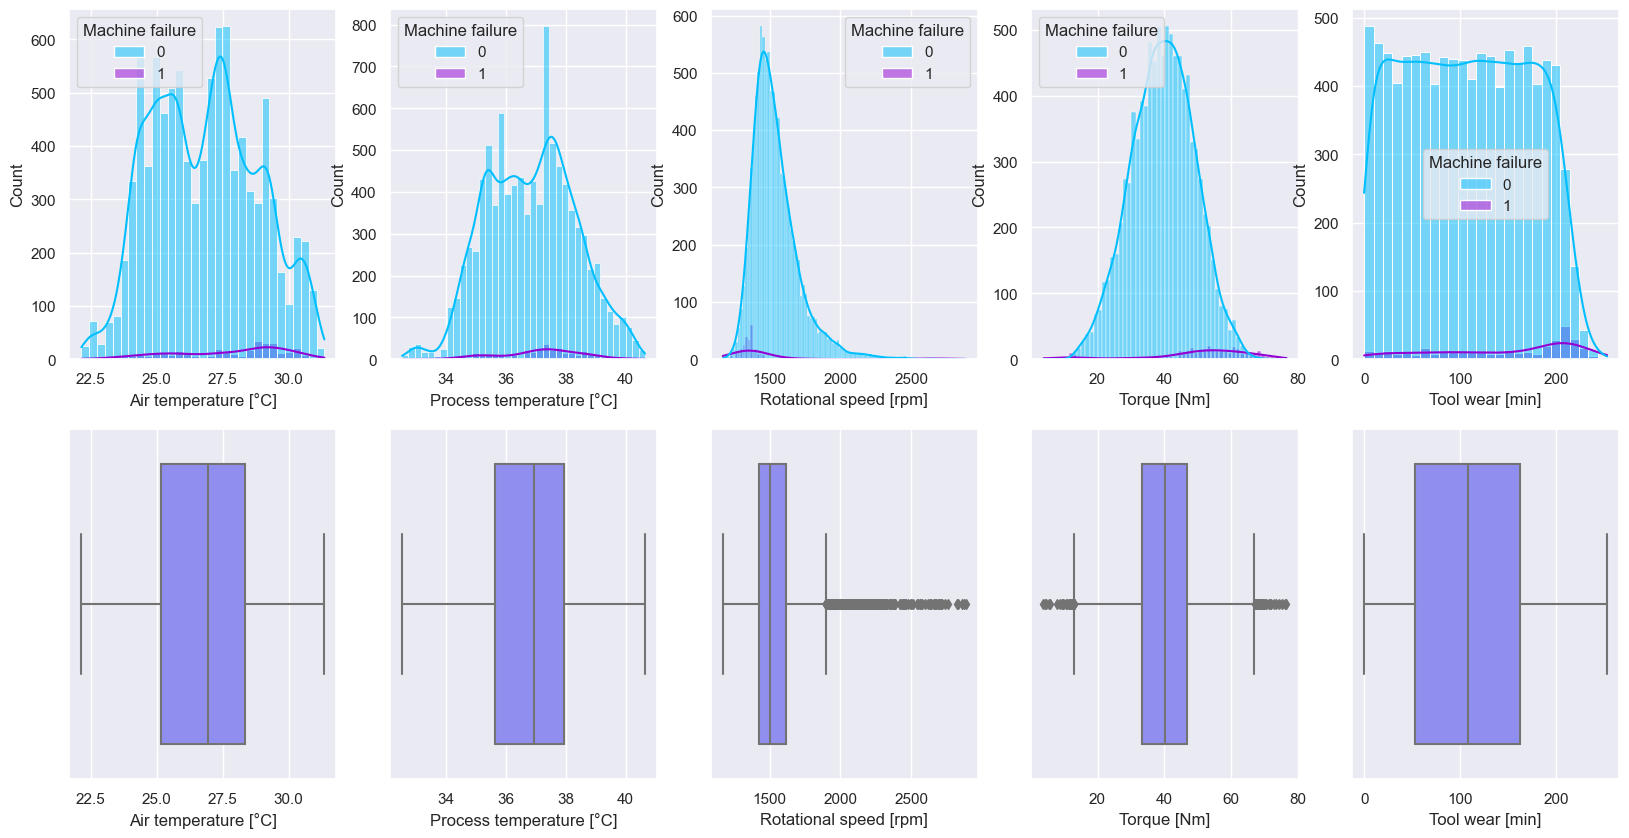

In [14]:
fig, axes = plt.subplots(2, 5, figsize=[20,10])
j = 0
colors = ["deepskyblue", "darkviolet"]

for i in ["Air temperature [°C]", "Process temperature [°C]", "Rotational speed [rpm]", "Torque [Nm]", "Tool wear [min]"]:
    sns.histplot(data=data_reduced, x=i, kde=True, ax=axes[0,j], hue="Machine failure", palette=colors)
    sns.boxplot(data=data_reduced, x=i, ax=axes[1,j], palette="cool")
    j+=1

The graphs show that the attributes "Air temperature [°C]", "Process temperature [°C]" and "Tool wear [min]" are relatively evenly distributed, with all the different values for "Tool wear [min]" occurring almost equally often. The attribute "Rotational speed [rpm]", on the other hand, is shifted to the left in the histogram and has outliers in the direction of higher values. The attribute "Torque [Nm]" is evenly distributed in the histogram, but still has outliers. These are mainly seen in the boxplot and exist both in the ascending and descending direction of the values.

Since the outliers only occur on one side (right) for Rotational Speed, they are removed by applying the 99% quantile.

In [15]:
q = data_reduced["Rotational speed [rpm]"].quantile(0.99)
data_no_outliers = data_reduced[data_reduced["Rotational speed [rpm]"]<q]

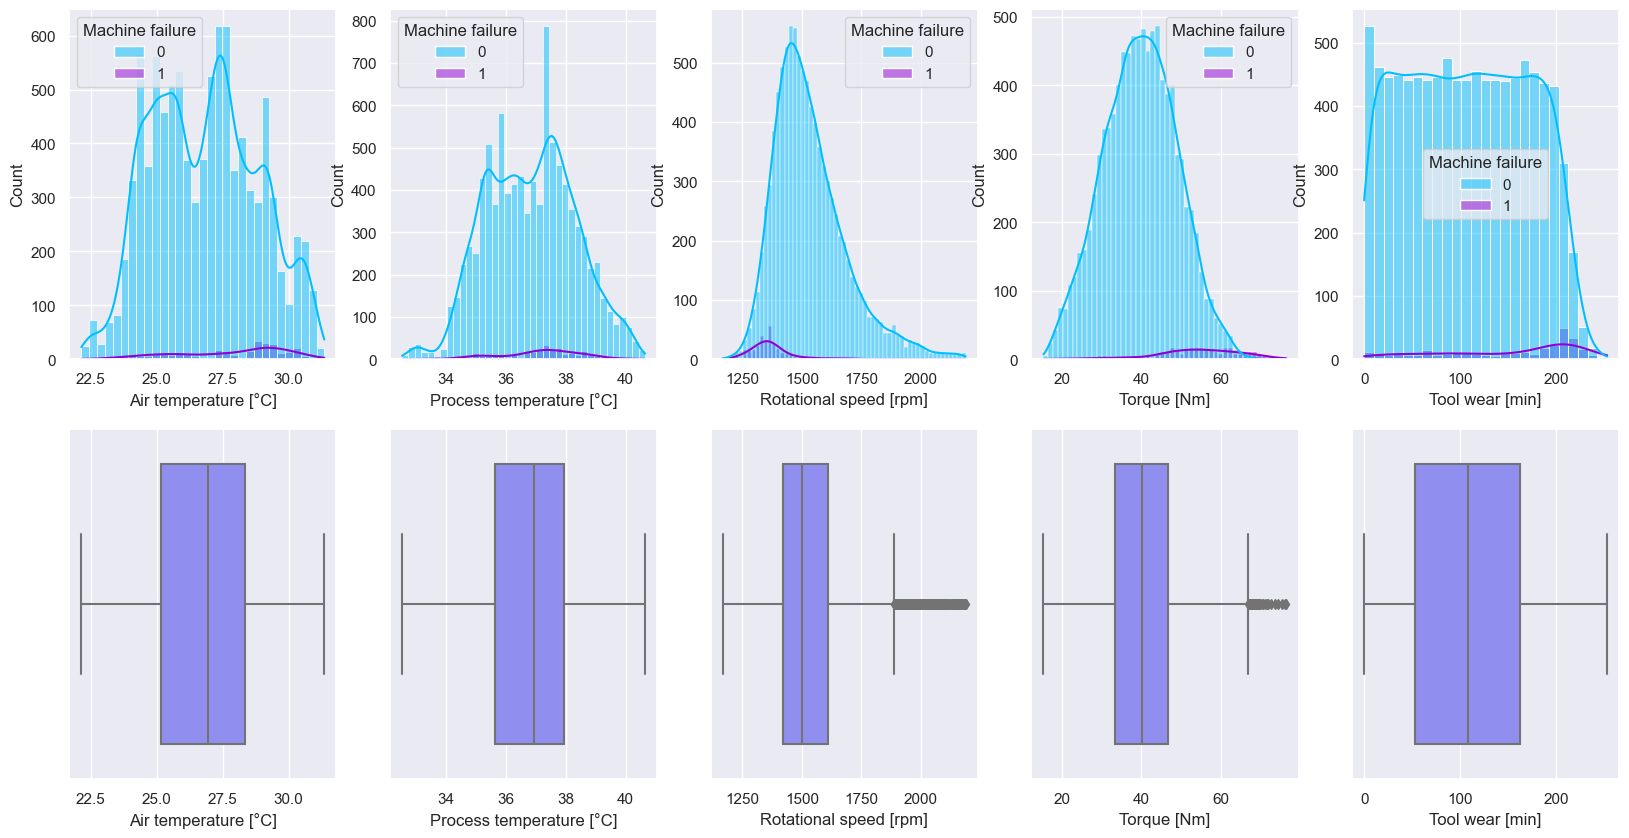

In [16]:
fig, axes = plt.subplots(2, 5, figsize=[20,10])
j = 0
colors = ["deepskyblue", "darkviolet"]

for i in ["Air temperature [°C]", "Process temperature [°C]", "Rotational speed [rpm]", "Torque [Nm]", "Tool wear [min]"]:
    sns.histplot(data=data_no_outliers, x=i, kde=True, ax=axes[0,j], hue="Machine failure", palette=colors)
    sns.boxplot(data=data_no_outliers, x=i, ax=axes[1,j], palette="cool")
    j+=1

In this way, the outliers from Torque on the left side were removed as well. To also remove the outliers on the right side, the 99% quantile is used there too.

In [17]:
q = data_no_outliers["Torque [Nm]"].quantile(0.99)
data_no_outliers2 = data_no_outliers[data_no_outliers["Torque [Nm]"]<q]

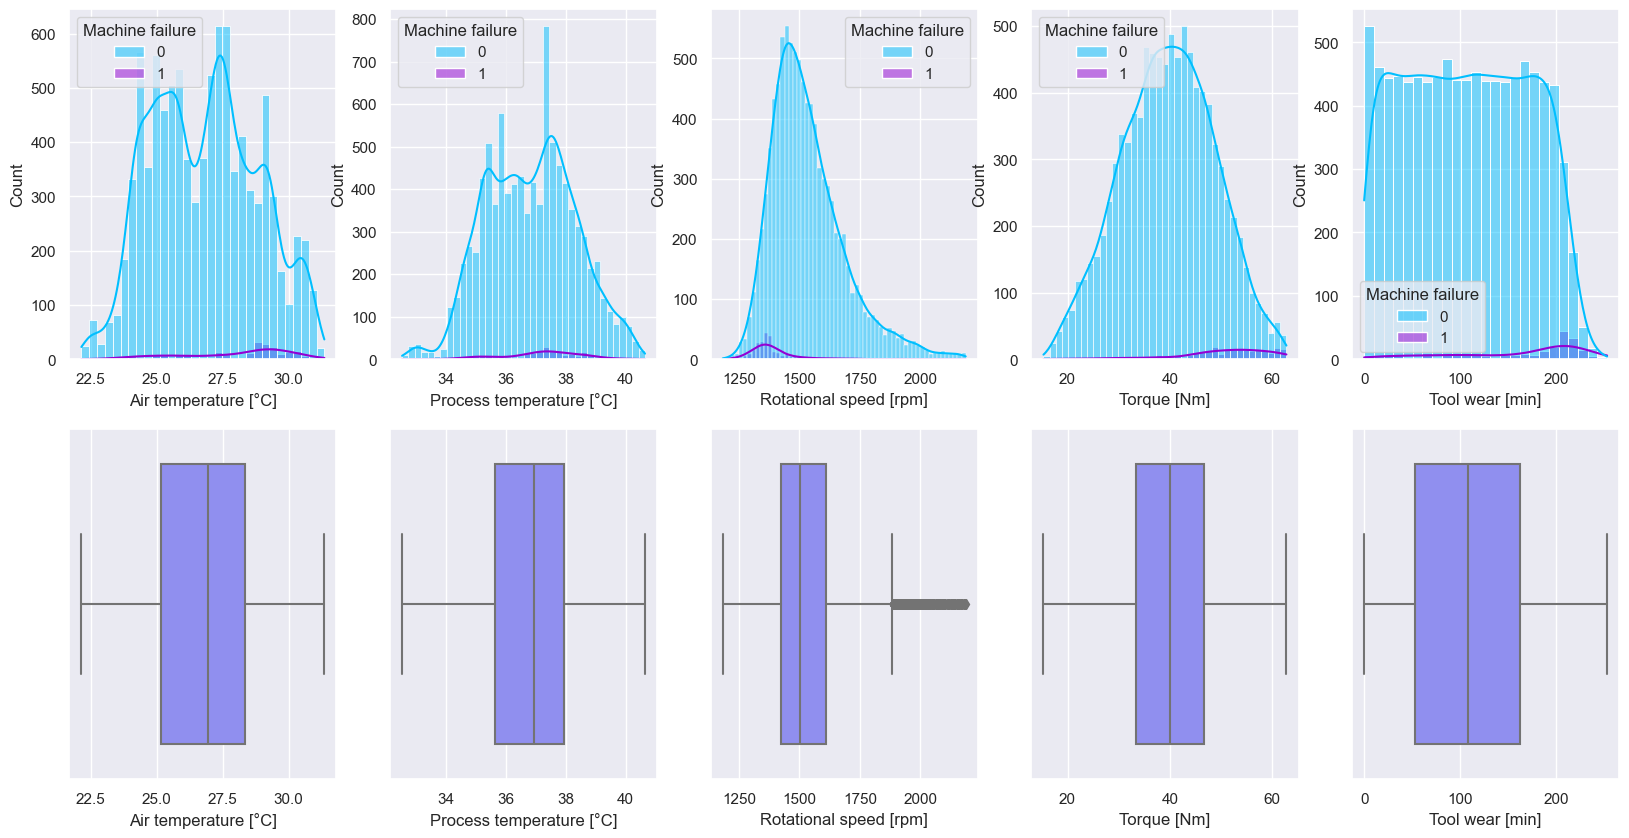

In [18]:
fig, axes = plt.subplots(2, 5, figsize=[20,10])
j = 0
colors = ["deepskyblue", "darkviolet"]

for i in ["Air temperature [°C]", "Process temperature [°C]", "Rotational speed [rpm]", "Torque [Nm]", "Tool wear [min]"]:
    sns.histplot(data=data_no_outliers2, x=i, kde=True, ax=axes[0,j], hue="Machine failure", palette=colors)
    sns.boxplot(data=data_no_outliers2, x=i, ax=axes[1,j], palette="cool")
    j+=1

In [19]:
data_no_outliers2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9801 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Type                      9801 non-null   object 
 1   Air temperature [°C]      9801 non-null   float64
 2   Process temperature [°C]  9801 non-null   float64
 3   Rotational speed [rpm]    9801 non-null   int64  
 4   Torque [Nm]               9801 non-null   float64
 5   Tool wear [min]           9801 non-null   int64  
 6   Machine failure           9801 non-null   int64  
 7   TWF                       9801 non-null   int64  
 8   HDF                       9801 non-null   int64  
 9   PWF                       9801 non-null   int64  
 10  OSF                       9801 non-null   int64  
 11  RNF                       9801 non-null   int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 995.4+ KB


After both steps, the expressions of the target variables must now be compared.

In [20]:
value_counts = data_no_outliers2["Machine failure"].value_counts()
percentage = value_counts / len(data_no_outliers2) *100
print(value_counts)
print(percentage)

Machine failure
0    9556
1     245
Name: count, dtype: int64
Machine failure
0    97.500255
1     2.499745
Name: count, dtype: float64


When comparing the percentage distribution of errors in the target variable, it can be seen that the percentage of errors decreases from 3.39% before removing the outliers to 2.5% after removing the outliers. Since the distribution of error occurrence previously showed that the data set is unbalanced with respect to the target variable (this issue will be addressed later), the steps to remove the outliers are not considered further and further development is again based on the data set with status before removal ("data_reduced"). 

In order to counteract the outliers anyway, the RobustScaler for the two affected attributes is used for scaling in the later course.

### Target variables
In the data set, the features "Machine Failure", "TWF", "HDF", "PWF", "OSF" and "RNF" are defined as target variables. With "Machine Failure" a binary classification is performed later and with the other five target variables a multi-class classification is performed.
First, however, it is checked whether the respective values then also match between "Machine failure" and the other features. For this purpose, the five features of the different defect expressions are brought into a common column and, so to speak, a one-hot encoding, which these features are similar to, is undone. After that, the newly created column should contain the respective defect for each data point or that there is no defect. 

In order to recognize the defect better, the columns of the features are firtsly renamed with the full name.

In [21]:
data_reduced.rename(columns={"TWF" : "Tool Wear Failure", "HDF" : "Heat Dissipation Failure",
                            "PWF" : "Power Failure", "OSF" : "Overstrain Failure", "RNF" : "Random Failures"},inplace=True)

In [22]:
data_reduced.head()

Type  Air temperature [°C]  Process temperature [°C]  \
0    M                 24.95                     35.45   
1    L                 25.05                     35.55   
2    L                 24.95                     35.35   
3    L                 25.05                     35.45   
4    L                 25.05                     35.55   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  \
0                    1551         42.8                0                0   
1                    1408         46.3                3                0   
2                    1498         49.4                5                0   
3                    1433         39.5                7                0   
4                    1408         40.0                9                0   

   Tool Wear Failure  Heat Dissipation Failure  Power Failure  \
0                  0                         0              0   
1                  0                         0              0   
2                  0                         0              0   
3                  0                         0              0   
4                  0                         0              0   

   Overstrain Failure  Random Failures  
0                   0                0  
1                   0                0  
2                   0                0  
3                   0                0  
4                   0                0

Subsequently, the five target variables are combined in a common column, whereby "No Failure" is to be used in the case of no defect. The procedure is to refer only to these columns, so that they are determined before as "selected_columns".

In [23]:
selected_columns = ["Tool Wear Failure","Heat Dissipation Failure","Power Failure",
                   "Overstrain Failure","Random Failures"]

In [24]:
default_entry = "No Failure"

In [25]:
data_reduced["Failure Mode"] = data_reduced[selected_columns].idxmax(axis=1).fillna(default_entry)

In [26]:
data_reduced.head(80)

Type  Air temperature [°C]  Process temperature [°C]  \
0     M                 24.95                     35.45   
1     L                 25.05                     35.55   
2     L                 24.95                     35.35   
3     L                 25.05                     35.45   
4     L                 25.05                     35.55   
..  ...                   ...                       ...   
75    L                 25.65                     35.75   
76    L                 25.65                     35.75   
77    L                 25.65                     35.75   
78    L                 25.65                     35.75   
79    L                 25.65                     35.75   

    Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  \
0                     1551         42.8                0                0   
1                     1408         46.3                3                0   
2                     1498         49.4                5                0   
3                     1433         39.5                7                0   
4                     1408         40.0                9                0   
..                     ...          ...              ...              ...   
75                    1379         46.7              204                0   
76                    1461         47.9              206                0   
77                    1455         41.3              208                1   
78                    1398         51.5                0                0   
79                    1402         37.9                2                0   

    Tool Wear Failure  Heat Dissipation Failure  Power Failure  \
0                   0                         0              0   
1                   0                         0              0   
2                   0                         0              0   
3                   0                         0              0   
4                   0                         0              0   
..                ...                       ...            ...   
75                  0                         0              0   
76                  0                         0              0   
77                  1                         0              0   
78                  0                         0              0   
79                  0                         0              0   

    Overstrain Failure  Random Failures       Failure Mode  
0                    0                0  Tool Wear Failure  
1                    0                0  Tool Wear Failure  
2                    0                0  Tool Wear Failure  
3                    0                0  Tool Wear Failure  
4                    0                0  Tool Wear Failure  
..                 ...              ...                ...  
75                   0                0  Tool Wear Failure  
76                   0                0  Tool Wear Failure  
77                   0                0  Tool Wear Failure  
78                   0                0  Tool Wear Failure  
79                   0                0  Tool Wear Failure  

[80 rows x 13 columns]

In [27]:
data_reduced["Failure Mode"].value_counts()

Failure Mode
Tool Wear Failure           9698
Heat Dissipation Failure     115
Power Failure                 91
Overstrain Failure            78
Random Failures               18
Name: count, dtype: int64

Combining the five columns does not work correctly, because in some columns there is not only a 1, but in more than one different columns there is a 1. This means that more defect types occurred there. This is also noted in the data set explanation, which explains that it is not clear which defect really caused the machine failure.

Thus, these lines are now looked at first, which have more than one 1 in the five columns of the defect types.

In [28]:
# List of selected columns
selected_columns = ["Tool Wear Failure","Heat Dissipation Failure","Power Failure",
                   "Overstrain Failure","Random Failures"]

# Check which lines meet the condition
rows_check = (data_reduced[selected_columns] == 1).sum(axis=1) > 1

In [29]:
data_check = data_reduced[rows_check]

In [30]:
data_check

Type  Air temperature [°C]  Process temperature [°C]  \
69      L                 25.75                     35.85   
1324    M                 25.65                     36.95   
1496    L                 24.85                     35.55   
3611    L                 28.55                     37.75   
3854    L                 29.25                     37.85   
3943    L                 29.15                     38.25   
4254    L                 29.45                     37.85   
4342    M                 28.55                     36.65   
4370    L                 28.85                     36.75   
4383    L                 28.55                     36.35   
4417    L                 29.45                     37.25   
4462    L                 29.55                     37.35   
4642    L                 30.05                     38.25   
4643    L                 30.05                     38.25   
4729    L                 30.25                     38.65   
5394    M                 29.65                     39.15   
5401    M                 29.45                     39.15   
5909    H                 27.55                     37.05   
6248    L                 27.65                     36.95   
7083    L                 27.55                     37.25   
8846    M                 24.25                     35.65   
8926    M                 24.15                     35.15   
9084    L                 24.05                     34.75   
9974    L                 25.45                     35.05   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  \
69                      1410         65.7              191                1   
1324                    1243         74.5              194                1   
1496                    1268         69.4              189                1   
3611                    1405         46.4              207                1   
3854                    1338         67.6              194                1   
3943                    1333         66.7              205                1   
4254                    1284         68.0              114                1   
4342                    1284         68.2              111                1   
4370                    1308         57.6              197                1   
4383                    1298         65.5              229                1   
4417                    1365         66.8               80                1   
4462                    1263         67.8              197                1   
4642                    1238         54.6              226                1   
4643                    1324         54.2              228                1   
4729                    1306         61.0              215                1   
5394                    1262         70.5              234                1   
5401                    1454         54.8              253                1   
5909                    1364         65.3              208                1   
6248                    1405         61.2              189                1   
7083                    1416         61.8              209                1   
8846                    1325         62.4              204                1   
8926                    1459         59.6              207                1   
9084                    1326         75.4              172                1   
9974                    1361         68.2              172                1   

      Tool Wear Failure  Heat Dissipation Failure  Power Failure  \
69                    0                         0              1   
1324                  0                         0              1   
1496                  0                         0              1   
3611                  1                         0              0   
3854                  0                         0              1   
3943                  0                         0              1   
4254                  0    

In [31]:
data_check.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, 69 to 9974
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Type                      24 non-null     object 
 1   Air temperature [°C]      24 non-null     float64
 2   Process temperature [°C]  24 non-null     float64
 3   Rotational speed [rpm]    24 non-null     int64  
 4   Torque [Nm]               24 non-null     float64
 5   Tool wear [min]           24 non-null     int64  
 6   Machine failure           24 non-null     int64  
 7   Tool Wear Failure         24 non-null     int64  
 8   Heat Dissipation Failure  24 non-null     int64  
 9   Power Failure             24 non-null     int64  
 10  Overstrain Failure        24 non-null     int64  
 11  Random Failures           24 non-null     int64  
 12  Failure Mode              24 non-null     object 
dtypes: float64(3), int64(8), object(2)
memory usage: 2.6+ KB


To determine which error is set as the main error and finally the only error, the respective numbers of errors are checked in the total data set.

In [32]:
count_twf = data_reduced["Tool Wear Failure"].value_counts()[1]
print("TWF: ",count_twf)
count_hsf = data_reduced["Heat Dissipation Failure"].value_counts()[1]
print("HSF: ",count_hsf)
count_pwf = data_reduced["Power Failure"].value_counts()[1]
print("PWF: ",count_pwf)
count_osf = data_reduced["Overstrain Failure"].value_counts()[1]
print("OSF: ",count_osf)
count_rnf = data_reduced["Random Failures"].value_counts()[1]
print("RNF: ",count_rnf)

TWF:  46
HSF:  115
PWF:  95
OSF:  98
RNF:  19


### Remove a second failure mode per line

Since the failures are relatively balanced except for the Random Failures category, it is specified that for each data point where two failures or more occur, the first column to occur retains the 1 and the other failure is set to 0.

In [33]:
# Update the values in the affected rows

def fix_row(row):
    ones_indices = row[row == 1].index
    if len(ones_indices) > 1:
        row[row == 1] = 0
        row[ones_indices[0]] = 1
    return row

data_reduced.loc[rows_check, selected_columns] = data_reduced.loc[rows_check, selected_columns].apply(fix_row, axis=1)

In [34]:
# Check example
data_reduced.loc[4254]

Type                                               L
Air temperature [°C]                           29.45
Process temperature [°C]                       37.85
Rotational speed [rpm]                          1284
Torque [Nm]                                     68.0
Tool wear [min]                                  114
Machine failure                                    1
Tool Wear Failure                                  0
Heat Dissipation Failure                           1
Power Failure                                      0
Overstrain Failure                                 0
Random Failures                                    0
Failure Mode                Heat Dissipation Failure
Name: 4254, dtype: object

In [35]:
data_reduced[rows_check]

Type  Air temperature [°C]  Process temperature [°C]  \
69      L                 25.75                     35.85   
1324    M                 25.65                     36.95   
1496    L                 24.85                     35.55   
3611    L                 28.55                     37.75   
3854    L                 29.25                     37.85   
3943    L                 29.15                     38.25   
4254    L                 29.45                     37.85   
4342    M                 28.55                     36.65   
4370    L                 28.85                     36.75   
4383    L                 28.55                     36.35   
4417    L                 29.45                     37.25   
4462    L                 29.55                     37.35   
4642    L                 30.05                     38.25   
4643    L                 30.05                     38.25   
4729    L                 30.25                     38.65   
5394    M                 29.65                     39.15   
5401    M                 29.45                     39.15   
5909    H                 27.55                     37.05   
6248    L                 27.65                     36.95   
7083    L                 27.55                     37.25   
8846    M                 24.25                     35.65   
8926    M                 24.15                     35.15   
9084    L                 24.05                     34.75   
9974    L                 25.45                     35.05   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  \
69                      1410         65.7              191                1   
1324                    1243         74.5              194                1   
1496                    1268         69.4              189                1   
3611                    1405         46.4              207                1   
3854                    1338         67.6              194                1   
3943                    1333         66.7              205                1   
4254                    1284         68.0              114                1   
4342                    1284         68.2              111                1   
4370                    1308         57.6              197                1   
4383                    1298         65.5              229                1   
4417                    1365         66.8               80                1   
4462                    1263         67.8              197                1   
4642                    1238         54.6              226                1   
4643                    1324         54.2              228                1   
4729                    1306         61.0              215                1   
5394                    1262         70.5              234                1   
5401                    1454         54.8              253                1   
5909                    1364         65.3              208                1   
6248                    1405         61.2              189                1   
7083                    1416         61.8              209                1   
8846                    1325         62.4              204                1   
8926                    1459         59.6              207                1   
9084                    1326         75.4              172                1   
9974                    1361         68.2              172                1   

      Tool Wear Failure  Heat Dissipation Failure  Power Failure  \
69                    0                         0              1   
1324                  0                         0              1   
1496                  0                         0              1   
3611                  1                         0              0   
3854                  0                         0              1   
3943                  0                         0              1   
4254                  0    

In [36]:
rows_check2 = (data_reduced[selected_columns] == 1).sum(axis=1) > 1

In [37]:
data_reduced[rows_check2]

Empty DataFrame
Columns: [Type, Air temperature [°C], Process temperature [°C], Rotational speed [rpm], Torque [Nm], Tool wear [min], Machine failure, Tool Wear Failure, Heat Dissipation Failure, Power Failure, Overstrain Failure, Random Failures, Failure Mode]
Index: []

Now all duplicate error values have been reduced by keeping the first 1 that occurs and setting all other values with a 1 to 0.

Thus, the distributions of the errors are now considered again.

In [38]:
count_twf = data_reduced["Tool Wear Failure"].value_counts()[1]
print("TWF: ",count_twf)
count_hsf = data_reduced["Heat Dissipation Failure"].value_counts()[1]
print("HSF: ",count_hsf)
count_pwf = data_reduced["Power Failure"].value_counts()[1]
print("PWF: ",count_pwf)
count_osf = data_reduced["Overstrain Failure"].value_counts()[1]
print("OSF: ",count_osf)
count_rnf = data_reduced["Random Failures"].value_counts()[1]
print("RNF: ",count_rnf)

TWF:  46
HSF:  115
PWF:  91
OSF:  78
RNF:  18


### Create one column as combination of the five failure modes

Now the five columns of the different defect types can be combined into one common column. In case there is no failure and none of the five columns has a 1, a default_entry with "No Failure" is defined, which is then to be assigned.

In [39]:
default_entry = "No Failure"
print(default_entry)

No Failure


In [40]:
max_column = data_reduced[selected_columns].apply(lambda row: np.nan if sum(row) == 0 else row.idxmax(), axis=1)
data_reduced["Failure Mode"] = max_column.fillna(default_entry)

In [41]:
data_reduced.head(80)

Type  Air temperature [°C]  Process temperature [°C]  \
0     M                 24.95                     35.45   
1     L                 25.05                     35.55   
2     L                 24.95                     35.35   
3     L                 25.05                     35.45   
4     L                 25.05                     35.55   
..  ...                   ...                       ...   
75    L                 25.65                     35.75   
76    L                 25.65                     35.75   
77    L                 25.65                     35.75   
78    L                 25.65                     35.75   
79    L                 25.65                     35.75   

    Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  \
0                     1551         42.8                0                0   
1                     1408         46.3                3                0   
2                     1498         49.4                5                0   
3                     1433         39.5                7                0   
4                     1408         40.0                9                0   
..                     ...          ...              ...              ...   
75                    1379         46.7              204                0   
76                    1461         47.9              206                0   
77                    1455         41.3              208                1   
78                    1398         51.5                0                0   
79                    1402         37.9                2                0   

    Tool Wear Failure  Heat Dissipation Failure  Power Failure  \
0                   0                         0              0   
1                   0                         0              0   
2                   0                         0              0   
3                   0                         0              0   
4                   0                         0              0   
..                ...                       ...            ...   
75                  0                         0              0   
76                  0                         0              0   
77                  1                         0              0   
78                  0                         0              0   
79                  0                         0              0   

    Overstrain Failure  Random Failures       Failure Mode  
0                    0                0         No Failure  
1                    0                0         No Failure  
2                    0                0         No Failure  
3                    0                0         No Failure  
4                    0                0         No Failure  
..                 ...              ...                ...  
75                   0                0         No Failure  
76                   0                0         No Failure  
77                   0                0  Tool Wear Failure  
78                   0                0         No Failure  
79                   0                0         No Failure  

[80 rows x 13 columns]

In [42]:
# Checking Failure Modes in the new column
data_reduced["Failure Mode"].value_counts()

Failure Mode
No Failure                  9652
Heat Dissipation Failure     115
Power Failure                 91
Overstrain Failure            78
Tool Wear Failure             46
Random Failures               18
Name: count, dtype: int64

### Comparing the different target variables

At this point it must be checked whether the "Machine Failure" column now matches the "Failure Mode" column or whether there are differences between the two columns.

First, the errors under "Machine Failure" are checked and thus all lines that contain a 1 there.

In [43]:
# Create new Dataframe with all rows that are declared as Machine Failure
data_no_failure = data_reduced[data_reduced["Machine failure"] == 1]

# Check the different Failure Modes in this Dataframe
data_no_failure["Failure Mode"].value_counts()

Failure Mode
Heat Dissipation Failure    115
Power Failure                91
Overstrain Failure           78
Tool Wear Failure            46
No Failure                    9
Name: count, dtype: int64

It can be seen that 9 of the values, which are actually declared as Machine Failure, have no defect mode assigned, so that "No Failure" was inserted there in the previous step. This is checked again with the detailed data.

In [44]:
data_no_failure[data_no_failure["Failure Mode"] == "No Failure"]

Type  Air temperature [°C]  Process temperature [°C]  \
1437    H                 25.65                     36.75   
2749    M                 26.55                     36.05   
4044    M                 28.75                     37.75   
4684    M                 30.45                     38.65   
5536    M                 29.15                     38.65   
5941    L                 27.45                     37.55   
6478    L                 27.35                     36.65   
8506    L                 25.25                     36.45   
9015    L                 24.05                     34.95   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  \
1437                    1439         45.2               40                1   
2749                    1685         28.9              179                1   
4044                    1419         47.7               20                1   
4684                    1421         44.8              101                1   
5536                    1363         54.0              119                1   
5941                    1438         48.5               78                1   
6478                    1663         29.1              145                1   
8506                    1710         27.3              163                1   
9015                    1431         49.7              210                1   

      Tool Wear Failure  Heat Dissipation Failure  Power Failure  \
1437                  0                         0              0   
2749                  0                         0              0   
4044                  0                         0              0   
4684                  0                         0              0   
5536                  0                         0              0   
5941                  0                         0              0   
6478                  0                         0              0   
8506                  0                         0              0   
9015                  0                         0              0   

      Overstrain Failure  Random Failures Failure Mode  
1437                   0                0   No Failure  
2749                   0                0   No Failure  
4044                   0                0   No Failure  
4684                   0                0   No Failure  
5536                   0                0   No Failure  
5941                   0                0   No Failure  
6478                   0                0   No Failure  
8506                   0                0   No Failure  
9015                   0                0   No Failure

However, it is not possible to tell from the data whether there is an error or not. Both would be possible and cannot be determined due to the lack of background knowledge. For this reason, these data points are removed from the data set by determining their respective index and then removing the respective rows.

In [45]:
index_uncertain_failure = data_no_failure[data_no_failure["Failure Mode"] == "No Failure"].index
data_reduced.drop(index_uncertain_failure, axis=0, inplace=True)

In [46]:
data_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9991 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Type                      9991 non-null   object 
 1   Air temperature [°C]      9991 non-null   float64
 2   Process temperature [°C]  9991 non-null   float64
 3   Rotational speed [rpm]    9991 non-null   int64  
 4   Torque [Nm]               9991 non-null   float64
 5   Tool wear [min]           9991 non-null   int64  
 6   Machine failure           9991 non-null   int64  
 7   Tool Wear Failure         9991 non-null   int64  
 8   Heat Dissipation Failure  9991 non-null   int64  
 9   Power Failure             9991 non-null   int64  
 10  Overstrain Failure        9991 non-null   int64  
 11  Random Failures           9991 non-null   int64  
 12  Failure Mode              9991 non-null   object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.1+ MB


The same is now checked for all data points that have no defect assigned and thus have the value 0 under "Machine Failure".

In [47]:
# Create new Dataframe with all rows that are declared as no Machine Failure
data_no_failure = data_reduced[data_reduced["Machine failure"] == 0]

# Check the different Failure Modes in this Dataframe
data_no_failure["Failure Mode"].value_counts()

Failure Mode
No Failure         9643
Random Failures      18
Name: count, dtype: int64

It can be seen that 18 of the values that are actually declared as no Machine Failure are assigned to the "Random Failure" defect mode. Since there are only 18 Random Failures in total, the entire category is affected. This is also checked again with the detailed data. This can be easily filtered to the Random Failures, since, as already described, all Random Failures are affected.

In [48]:
data_no_failure[data_no_failure["Failure Mode"] == "Random Failures"]

Type  Air temperature [°C]  Process temperature [°C]  \
1221    M                 23.85                     35.15   
1302    L                 25.45                     36.65   
1748    H                 25.25                     34.55   
2072    L                 26.45                     36.35   
2559    L                 26.15                     35.85   
3065    M                 26.95                     36.05   
3452    H                 28.45                     37.35   
5471    L                 29.55                     39.15   
5489    L                 29.45                     38.95   
5495    H                 29.75                     39.35   
5509    L                 29.65                     39.05   
5553    L                 29.35                     38.75   
5639    L                 29.45                     38.95   
6091    L                 27.75                     37.55   
6913    L                 27.65                     38.05   
6960    L                 27.55                     37.85   
7488    L                 27.15                     38.55   
7868    H                 27.25                     38.75   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  \
1221                    1399         46.4              132                0   
1302                    1505         45.7              144                0   
1748                    1626         31.1              166                0   
2072                    1570         35.5              189                0   
2559                    1447         50.4              140                0   
3065                    1687         27.7               95                0   
3452                    1602         32.3                2                0   
5471                    1346         61.2              170                0   
5489                    1499         35.0              215                0   
5495                    1357         55.0               12                0   
5509                    1509         36.5               52                0   
5553                    1306         59.7              172                0   
5639                    1668         28.7              180                0   
6091                    1412         57.5               16                0   
6913                    1481         38.5              181                0   
6960                    1413         52.0               91                0   
7488                    1545         43.5              160                0   
7868                    1438         46.7               41                0   

      Tool Wear Failure  Heat Dissipation Failure  Power Failure  \
1221                  0                         0              0   
1302                  0                         0              0   
1748                  0                         0              0   
2072                  0                         0              0   
2559                  0                         0              0   
3065                  0                         0              0   
3452                  0                         0              0   
5471                  0                         0              0   
5489                  0                         0              0   
5495                  0                         0              0   
5509                  0                         0              0   
5553                  0                         0              0   
5639                  0                         0              0   
6091                  0                         0              0   
6913                  0                         0              0   
6960                  0                         0              0   
7488                  0                         0              0   
7868                  0                         0              0   

      Overstrain Failure  Random Failures     Fail

Again, similar to above, it is not possible to tell whether there is an error or not. Both would be possible and cannot be determined due to the lack of background knowledge. For this reason, these data points are also removed from the data set by determining their respective index and then removing the respective rows.

In [49]:
index_uncertain_failure = data_no_failure[data_no_failure["Failure Mode"] == "Random Failures"].index
data_reduced.drop(index_uncertain_failure, axis=0, inplace=True)

In [50]:
data_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9973 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Type                      9973 non-null   object 
 1   Air temperature [°C]      9973 non-null   float64
 2   Process temperature [°C]  9973 non-null   float64
 3   Rotational speed [rpm]    9973 non-null   int64  
 4   Torque [Nm]               9973 non-null   float64
 5   Tool wear [min]           9973 non-null   int64  
 6   Machine failure           9973 non-null   int64  
 7   Tool Wear Failure         9973 non-null   int64  
 8   Heat Dissipation Failure  9973 non-null   int64  
 9   Power Failure             9973 non-null   int64  
 10  Overstrain Failure        9973 non-null   int64  
 11  Random Failures           9973 non-null   int64  
 12  Failure Mode              9973 non-null   object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.1+ MB


Thus, a total of 27 data points was removed, which corresponds to 0.27% of the entire data set. (9 of them as Failure in "Machine Failure" and No Failure in "Failure Mode" and 18 as No Failure in "Machine Failure" and Random Failure in "Failure Mode").

Since the complete category of Random Failures has been removed, this column can be removed accordingly.

In [51]:
data_reduced2 = data_reduced.drop(["Random Failures"], axis=1)

In [52]:
data_reduced2.head()

Type  Air temperature [°C]  Process temperature [°C]  \
0    M                 24.95                     35.45   
1    L                 25.05                     35.55   
2    L                 24.95                     35.35   
3    L                 25.05                     35.45   
4    L                 25.05                     35.55   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  \
0                    1551         42.8                0                0   
1                    1408         46.3                3                0   
2                    1498         49.4                5                0   
3                    1433         39.5                7                0   
4                    1408         40.0                9                0   

   Tool Wear Failure  Heat Dissipation Failure  Power Failure  \
0                  0                         0              0   
1                  0                         0              0   
2                  0                         0              0   
3                  0                         0              0   
4                  0                         0              0   

   Overstrain Failure Failure Mode  
0                   0   No Failure  
1                   0   No Failure  
2                   0   No Failure  
3                   0   No Failure  
4                   0   No Failure

### Check the balancing of the target variable "Machien failure" after the removing

In [53]:
value_counts = data_reduced2["Machine failure"].value_counts()
percentage = value_counts / len(data_reduced2) *100
print(value_counts)
print(percentage)

Machine failure
0    9643
1     330
Name: count, dtype: int64
Machine failure
0    96.691066
1     3.308934
Name: count, dtype: float64


### Index-Reset

Now that some data points have been removed, the index must be reset, otherwise it will no longer be continuous.

In [54]:
data_final = data_reduced2.reset_index(drop=True)

In [55]:
data_final.head()

Type  Air temperature [°C]  Process temperature [°C]  \
0    M                 24.95                     35.45   
1    L                 25.05                     35.55   
2    L                 24.95                     35.35   
3    L                 25.05                     35.45   
4    L                 25.05                     35.55   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  \
0                    1551         42.8                0                0   
1                    1408         46.3                3                0   
2                    1498         49.4                5                0   
3                    1433         39.5                7                0   
4                    1408         40.0                9                0   

   Tool Wear Failure  Heat Dissipation Failure  Power Failure  \
0                  0                         0              0   
1                  0                         0              0   
2                  0                         0              0   
3                  0                         0              0   
4                  0                         0              0   

   Overstrain Failure Failure Mode  
0                   0   No Failure  
1                   0   No Failure  
2                   0   No Failure  
3                   0   No Failure  
4                   0   No Failure

In [56]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9973 entries, 0 to 9972
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Type                      9973 non-null   object 
 1   Air temperature [°C]      9973 non-null   float64
 2   Process temperature [°C]  9973 non-null   float64
 3   Rotational speed [rpm]    9973 non-null   int64  
 4   Torque [Nm]               9973 non-null   float64
 5   Tool wear [min]           9973 non-null   int64  
 6   Machine failure           9973 non-null   int64  
 7   Tool Wear Failure         9973 non-null   int64  
 8   Heat Dissipation Failure  9973 non-null   int64  
 9   Power Failure             9973 non-null   int64  
 10  Overstrain Failure        9973 non-null   int64  
 11  Failure Mode              9973 non-null   object 
dtypes: float64(3), int64(7), object(2)
memory usage: 935.1+ KB


### Data analysis
First, the distributions of the categorical variable "Type" and the target variables are considered.

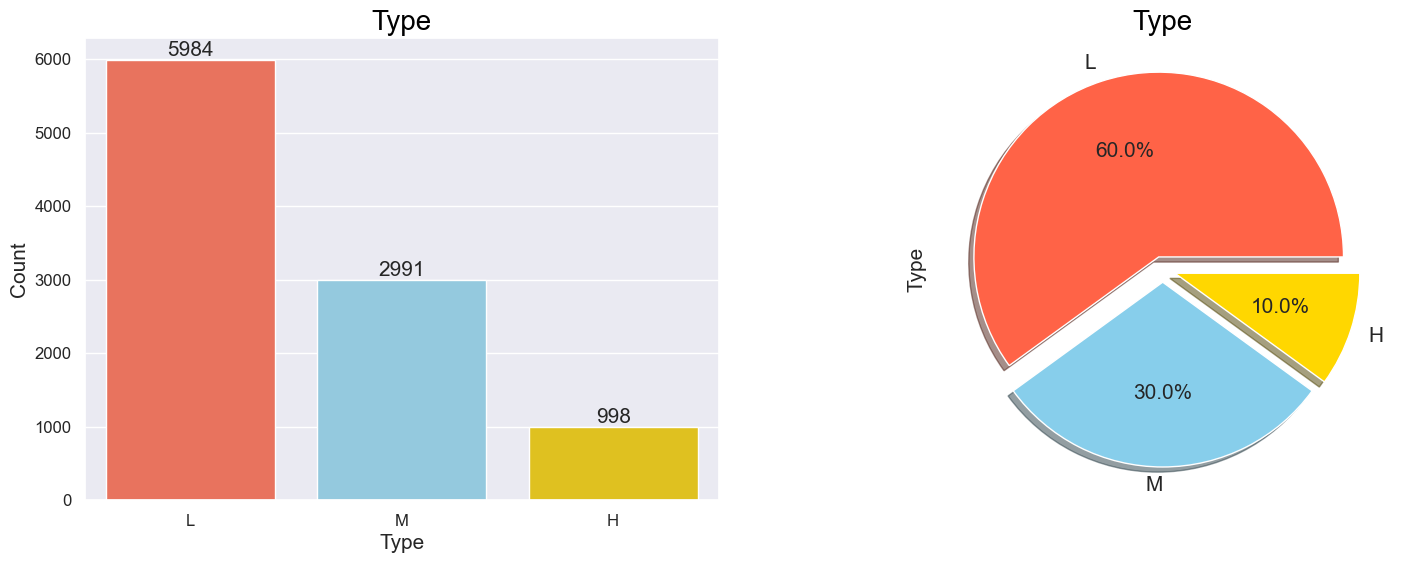

In [57]:
# Create figure
fig = plt.figure(figsize=(18, 6))
colors = ["tomato", "skyblue", "gold"]

# First diagram - Countplot
ax1 = fig.add_subplot(1, 2, 1)
sns.countplot(x="Type", data=data_final, order=["L", "M", "H"], ax=ax1, palette=colors)
ax1.bar_label(ax1.containers[0], fontsize=15)  # Adjust the font size of the column labels
ax1.set_title("Type", fontsize=20, color="black")
ax1.set_xlabel("Type", fontsize=15)
ax1.set_ylabel("Count", fontsize=15)
ax1.tick_params(axis="both", labelsize=12)

# Second diagram - Pie-Chart
ax2 = fig.add_subplot(1, 2, 2)
data_final["Type"].value_counts().loc[["L", "M", "H"]].plot.pie(explode=[0.07, 0.07, 0.07], autopct="%1.1f%%", 
                                                                shadow=True, ax=ax2, colors=colors)
ax2.set_title("Type", fontsize=20, color="black")
ax2.tick_params(axis="both", labelsize=15)
ax2.set_ylabel("Type", fontsize=15)

# Adjust the font size of the labels of the individual pie pieces
for text in ax2.texts:
    text.set_fontsize(15)

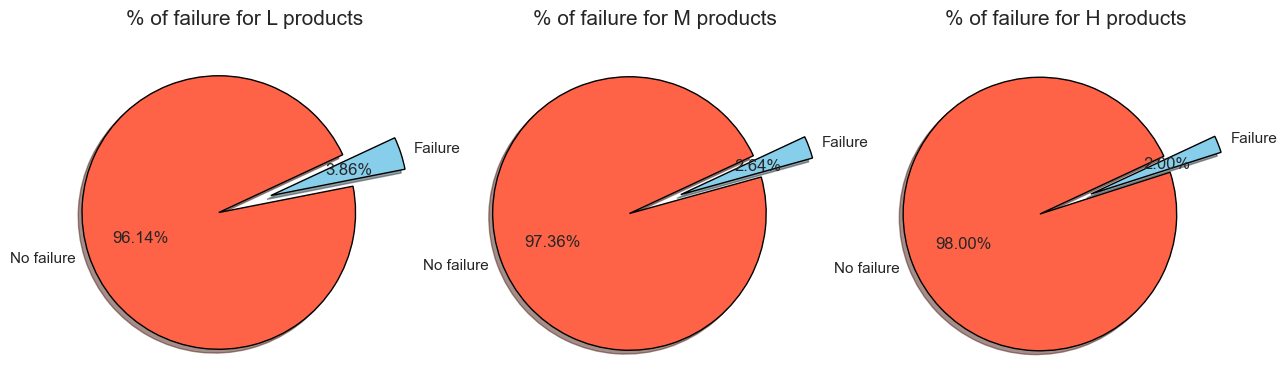

In [58]:
fig, axes = plt.subplots(1,3, figsize=[15,5])
axes.flatten()
j=0
colors = ["tomato", "skyblue"] 
for i in ["L", "M", "H"]:
    df_product_type = data_final[data_final["Type"] == i]
    axes[j].pie(df_product_type["Machine failure"].value_counts(), labels=["No failure", "Failure"],
                explode=[0.2, 0.2], autopct="%1.2f%%", wedgeprops={"edgecolor": "black"}, 
                shadow=True, startangle=25, colors=colors)
    axes[j].set_title("% of failure for " + i + " products", fontsize=15)
    j+=1

It can be deduced from this that L parts with a low quality have the highest proportion of defects. This is followed by M-type parts with a medium quality and finally H-type parts with a high quality.

Therefore, it can be deduced that the type has a certain influence on the occurrence of a defect, since parts of the highest quality have an overall lower proportion of defects.

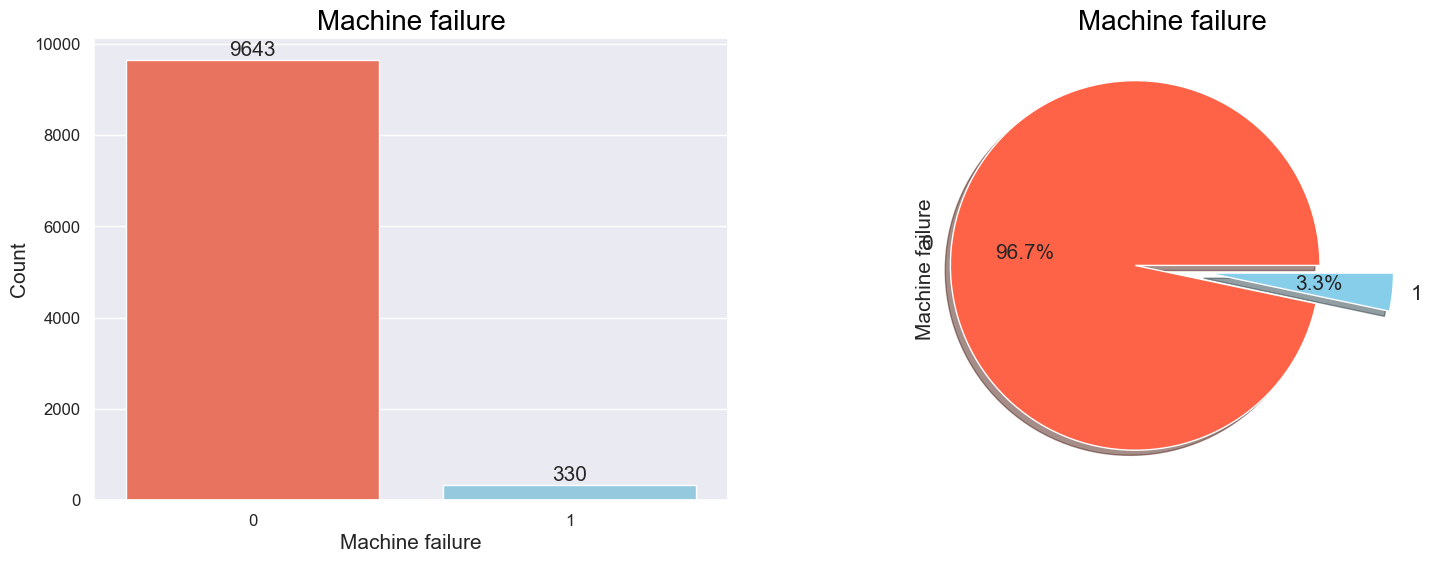

In [59]:
# Create figure
fig = plt.figure(figsize=(18, 6))
colors = ["tomato", "skyblue"]

# First diagram - Countplot
ax1 = fig.add_subplot(1, 2, 1)
sns.countplot(x="Machine failure", data=data_final, order=[0,1], ax=ax1, palette=colors)
ax1.bar_label(ax1.containers[0], fontsize=15)  # Adjust the font size of the column labels
ax1.set_title("Machine failure", fontsize=20, color="black")
ax1.set_xlabel("Machine failure", fontsize=15)
ax1.set_ylabel("Count", fontsize=15)
ax1.tick_params(axis="both", labelsize=12)

# Second diagram - Pie-Chart
ax2 = fig.add_subplot(1, 2, 2)
data_final["Machine failure"].value_counts().loc[[0,1]].plot.pie(explode=[0.2, 0.2], autopct="%1.1f%%", shadow=True, ax=ax2, colors=colors)
ax2.set_title("Machine failure", fontsize=20, color="black")
ax2.tick_params(axis="both", labelsize=15)
ax2.set_ylabel("Machine failure", fontsize=15)

# Adjust the font size of the labels of the individual pie pieces
for text in ax2.texts:
    text.set_fontsize(15)

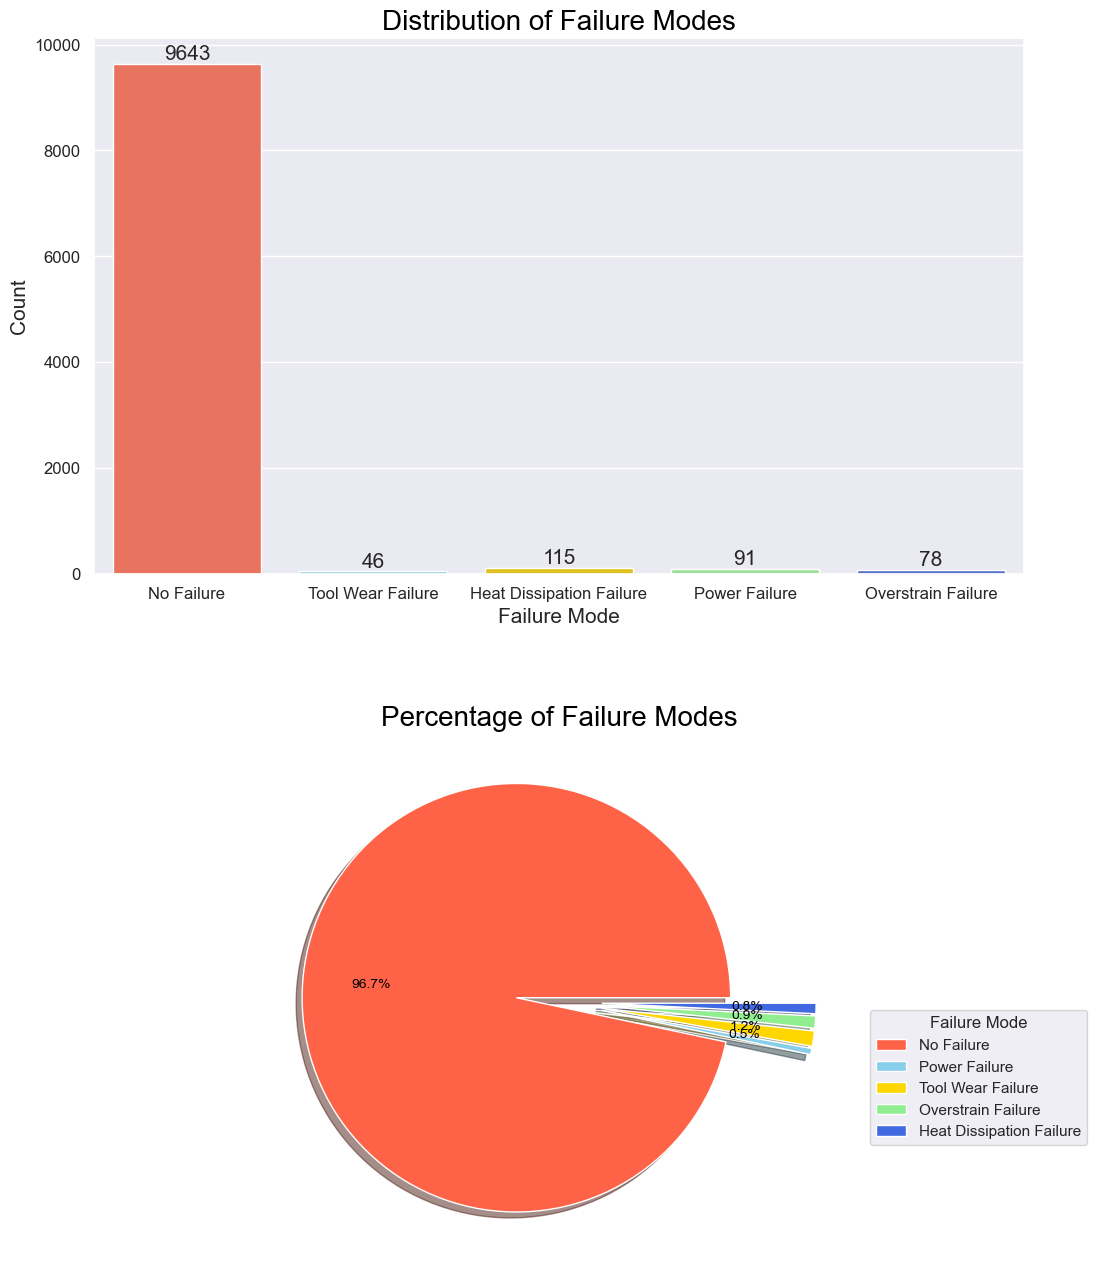

In [60]:
# Create figure
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 16))
colors = ["tomato", "skyblue","gold","lightgreen","royalblue"]

# First diagram - Countplot
ax1 = axes[0]
sns.countplot(x="Failure Mode", data=data_final, order=["No Failure","Tool Wear Failure","Heat Dissipation Failure",
                                                        "Power Failure","Overstrain Failure"], ax=ax1, palette=colors)
ax1.bar_label(ax1.containers[0], fontsize=15)  # Adjust the font size of the column labels
ax1.set_title("Distribution of Failure Modes", fontsize=20, color="black")
ax1.set_xlabel("Failure Mode", fontsize=15)
ax1.set_ylabel("Count", fontsize=15)
ax1.tick_params(axis="both", labelsize=12)

# Second diagram - Pie-Chart
ax2 = axes[1]
values = data_final["Failure Mode"].value_counts().loc[["No Failure","Tool Wear Failure","Heat Dissipation Failure",
                                                        "Power Failure","Overstrain Failure"]].values
labels = ["No Failure","Tool Wear Failure","Heat Dissipation Failure","Power Failure","Overstrain Failure"]
explode = [0.2,0.2, 0.2, 0.2, 0.2]
wedges, texts, autotexts = ax2.pie(values, labels=labels, explode=explode, colors=colors, autopct="%1.1f%%", shadow=True,
                                  labeldistance=1.1)
ax2.set_title("Percentage of Failure Modes", fontsize=20, color="black")
ax2.tick_params(axis="both", labelsize=15)
ax2.legend(data_final["Failure Mode"].unique(), title="Failure Mode", loc="upper right", bbox_to_anchor=(1.5, 0.5))
# Place value labels outside the pie chart
for text in autotexts:
    text.set_fontsize(15)
    text.set_color("black")
    text.set_position((1.1 * text.get_position()[0], text.get_position()[1]))
# Hide label inscriptions of the pie pieces
for text in texts:
    text.set_visible(False)
# Adjust the font size of the labels of the individual pie pieces
for text in ax2.texts:
    text.set_fontsize(10)
    
# Increase space between diagrams
fig.subplots_adjust(hspace=0.3)  # Increase distance between subplots

#### Defect mode depending on the features Rotational Speed and Torque

Text(0.5, 1.0, 'Excluding class no failure')

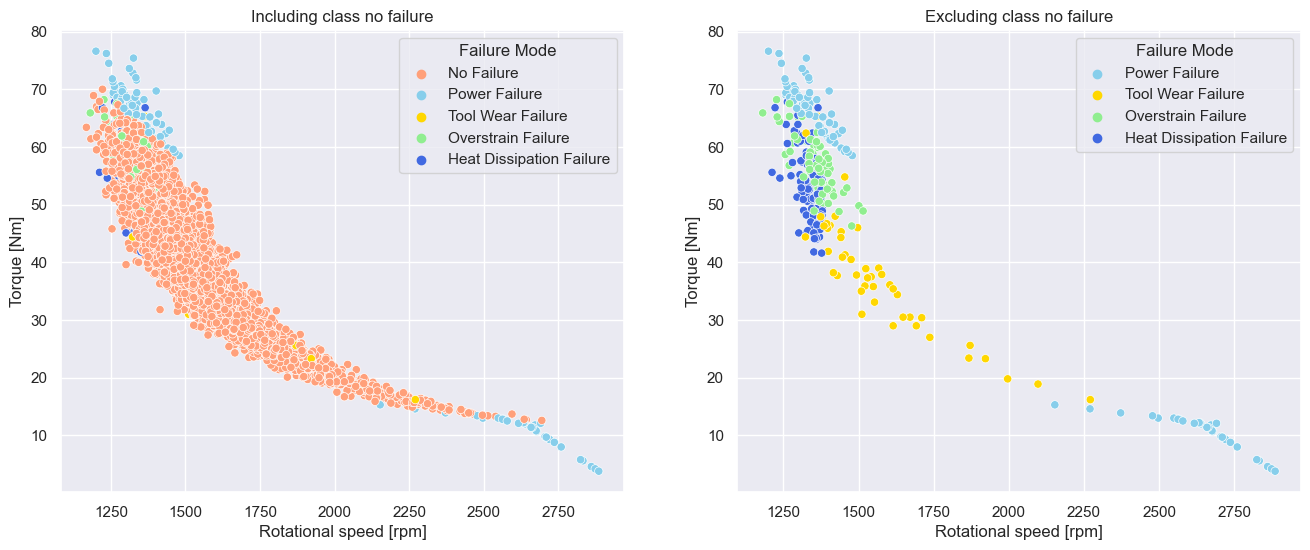

In [61]:
fig, ax = plt.subplots(1,2, figsize=[16,6])
plt.title("Rot. Speed vs Torque with reference to Failure Type")
sns.scatterplot(data=data_final, x="Rotational speed [rpm]", y="Torque [Nm]", hue="Failure Mode", 
                palette=["lightsalmon", "skyblue","gold","lightgreen","royalblue"], ax=ax[0])
sns.scatterplot(data=data_final[data_final["Machine failure"] == 1], x="Rotational speed [rpm]", y="Torque [Nm]", 
                hue="Failure Mode", palette=["skyblue","gold","lightgreen","royalblue"], ax=ax[1])

ax[0].set_title("Including class no failure")
ax[1].set_title("Excluding class no failure")

Power Failure: occurs at particularly high/low torque and at particularly high/low speed. Below a torque of 15Nm, above a torque of 70Nm and above a speed of 2500 rpm only Power Failures occur.

Tool Wear Failure: occurs as the only failure in the range of 1500-2100 rpm and between 20 and 40Nm of torque.

Overstrain Failure and Heat Dissipation Failure: occur at low speeds <1500rpm and at high torques of 40-70Nm.

### Correlations
In the following, the independent variables are examined with respect to their correlation. This is done first via a pair plot, where all numerical features are correlated in individual diagrams, and also via a heat map, which assigns concrete values to the correlation between these features.

#### Pairplot

C:\Users\ar\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


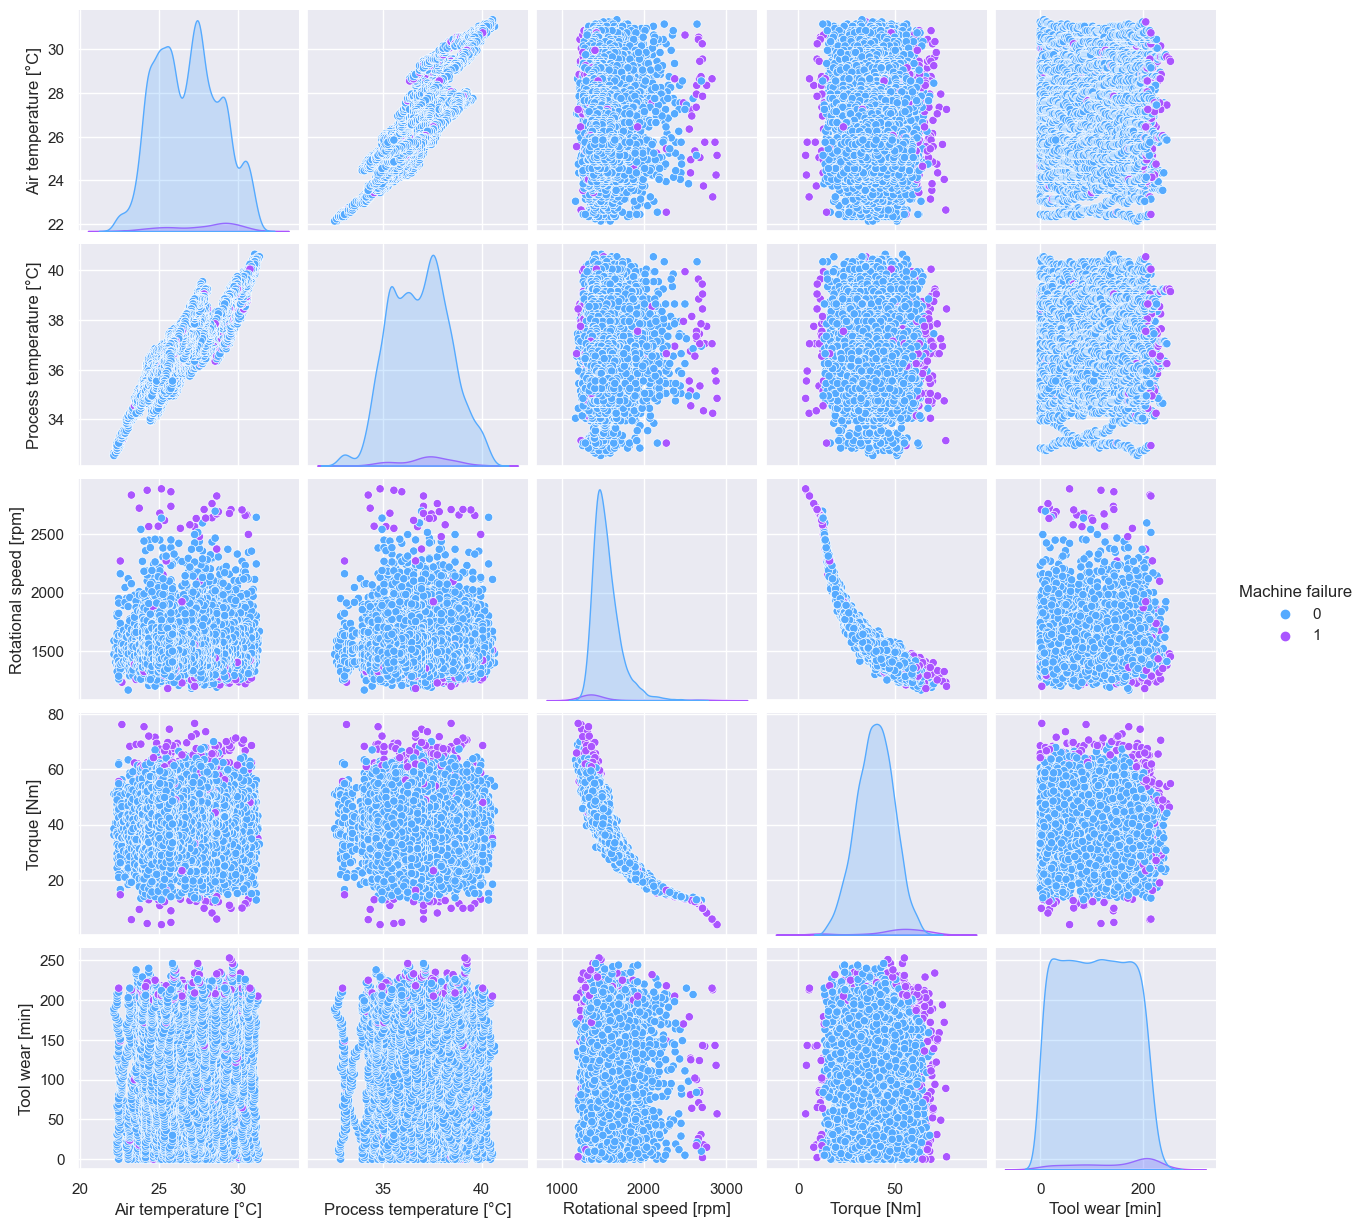

In [62]:
sns.pairplot(data_final, hue="Machine failure", palette="cool", vars=["Air temperature [°C]", 
                                                                      "Process temperature [°C]", "Rotational speed [rpm]", 
                                                                      "Torque [Nm]", "Tool wear [min]"])

This shows that the two features Air temperature and Process temperature as well as Rotational Speed and Torque are particularly correlated.
In addition, all graphs containing rotational speed and torque show that the extreme values of both, i.e. extremely low or extremely high, are most likely to lead to errors.

#### Violin Chart
This is again underlined by a violin chart in the following.

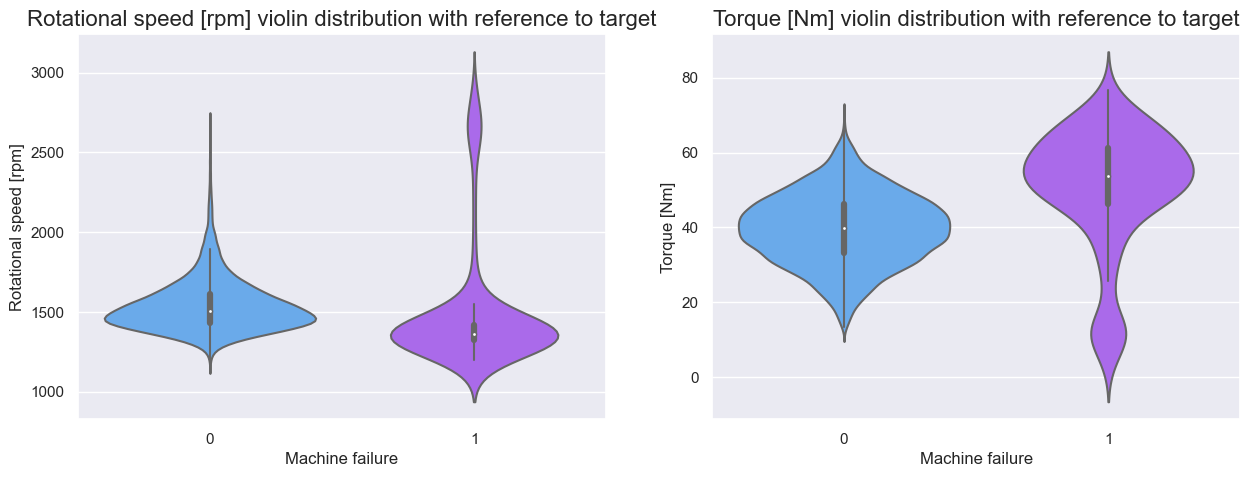

In [63]:
plt.rcParams["axes.labelsize"] = 12
plt.rcParams["axes.titlesize"] = 16

fig, axes = plt.subplots(1, 2, figsize=[15,5])
axes = axes.flatten()
j=0

for i in ["Rotational speed [rpm]","Torque [Nm]"]:
    sns.violinplot(data=data_final, x="Machine failure", y=i, ax=axes[j], palette="cool")
    axes[j].set_title(i + " violin distribution with reference to target", )
    j += 1

It can be seen that most errors occur at values that are significantly higher or lower than the average at no error.

#### Heatmap

In [66]:
non_numeric_columns = data_final.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_columns)

Non-numeric columns: Index(['Type', 'Failure Mode'], dtype='object')


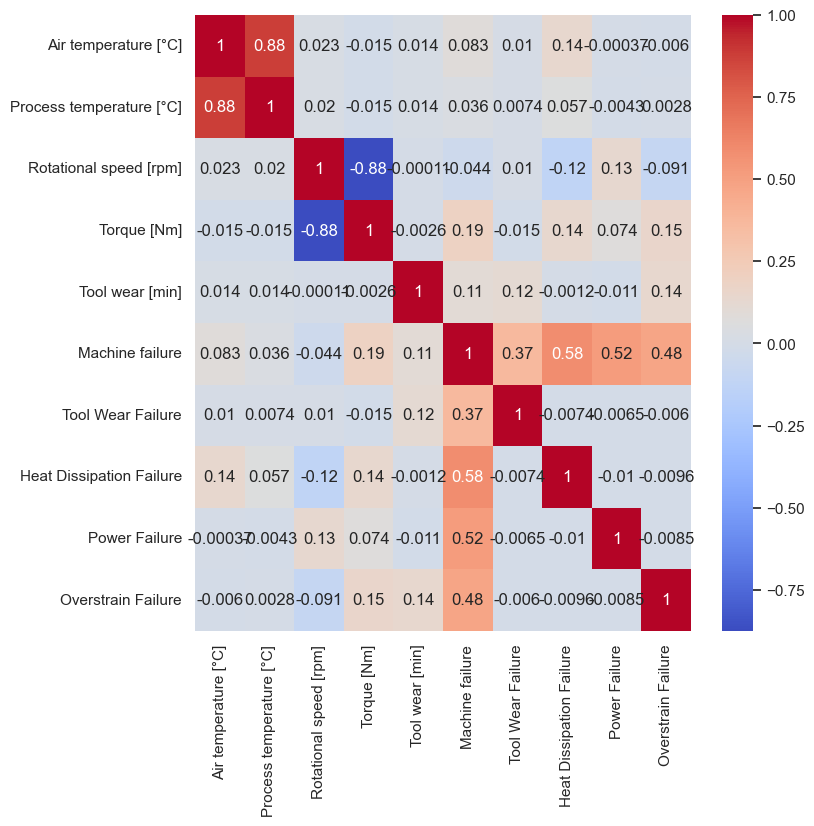

In [68]:
data_numeric = data_final.drop(columns=non_numeric_columns)
plt.figure(figsize=(8, 8))
sns.heatmap(data_numeric.corr(), annot=True, cmap="coolwarm")
plt.show()

The heat map also shows the correlations between Air temperature and Process temperature as well as Rotational Speed and Torque among the independent variables. However, there is the additional information that Air temperature and Process temperature are positively correlated while Rotational Speed and Torque are negatively correlated. Of course, the heatmap also shows the correlation between Machine failure and the four other defect types. However, since only either Machine Failure or the four defect types are used for the classification and these are the dependent variables, this is negligible.

### Feature Selection
Thus, two features are removed at this point. Between the two features Air temperature and Process temperature the feature Air temperature is removed because the Process temperature is more related to the process and the machine. Between the features Rotational Speed and Torque, the feature Rotational Speed is discarded because it is not evenly distributed when looking at the histogram, but has strong outliers on the right side.

In addition, the multicollinearity between the features is checked at this point via the Variance Inflation Factor. It is checked before and after reducing the two features.

In [69]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Declaring a data frame with all features to check for multicollinearity
# Since categorical data is not preprocessed, only the numerical ones are taken
variables = data_final[["Air temperature [°C]","Process temperature [°C]","Rotational speed [rpm]","Torque [Nm]","Tool wear [min]"]]

# Creating a new data frame which includes all VIFs
# Each variable has its own variance inflation factor. This measure is variable specific
vif = pd.DataFrame()

# Output of the respective VIFs by using the variance_inflation_factor module
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]

# Including variable names so it is easier to explore the result
vif["Features"] = variables.columns

In [70]:
vif

VIF                  Features
0   621.870040      Air temperature [°C]
1  1380.280551  Process temperature [°C]
2   191.307195    Rotational speed [rpm]
3    46.147708               Torque [Nm]
4     3.870109           Tool wear [min]

In [71]:
data_no_corr = data_final.drop(["Air temperature [°C]","Rotational speed [rpm]"], axis=1)

In [72]:
data_no_corr.head()

Type  Process temperature [°C]  Torque [Nm]  Tool wear [min]  \
0    M                     35.45         42.8                0   
1    L                     35.55         46.3                3   
2    L                     35.35         49.4                5   
3    L                     35.45         39.5                7   
4    L                     35.55         40.0                9   

   Machine failure  Tool Wear Failure  Heat Dissipation Failure  \
0                0                  0                         0   
1                0                  0                         0   
2                0                  0                         0   
3                0                  0                         0   
4                0                  0                         0   

   Power Failure  Overstrain Failure Failure Mode  
0              0                   0   No Failure  
1              0                   0   No Failure  
2              0                   0   No Failure  
3              0                   0   No Failure  
4              0                   0   No Failure

In [73]:
data_no_corr.describe(include="all")

Type  Process temperature [°C]  Torque [Nm]  Tool wear [min]  \
count   9973               9973.000000  9973.000000      9973.000000   
unique     3                       NaN          NaN              NaN   
top        L                       NaN          NaN              NaN   
freq    5984                       NaN          NaN              NaN   
mean     NaN                 36.854031    39.978993       107.921087   
std      NaN                  1.483692     9.966805        63.649152   
min      NaN                 32.550000     3.800000         0.000000   
25%      NaN                 35.650000    33.200000        53.000000   
50%      NaN                 36.950000    40.100000       108.000000   
75%      NaN                 37.950000    46.700000       162.000000   
max      NaN                 40.650000    76.600000       253.000000   

        Machine failure  Tool Wear Failure  Heat Dissipation Failure  \
count       9973.000000        9973.000000               9973.000000   
unique              NaN                NaN                       NaN   
top                 NaN                NaN                       NaN   
freq                NaN                NaN                       NaN   
mean           0.033089           0.004612                  0.011531   
std            0.178879           0.067762                  0.106768   
min            0.000000           0.000000                  0.000000   
25%            0.000000           0.000000                  0.000000   
50%            0.000000           0.000000                  0.000000   
75%            0.000000           0.000000                  0.000000   
max            1.000000           1.000000                  1.000000   

        Power Failure  Overstrain Failure Failure Mode  
count     9973.000000         9973.000000         9973  
unique            NaN                 NaN            5  
top               NaN                 NaN   No Failure  
freq              NaN                 NaN         9643  
mean         0.009125            0.007821          NaN  
std          0.095091            0.088095          NaN  
min          0.000000            0.000000          NaN  
25%          0.000000            0.000000          NaN  
50%          0.000000            0.000000          NaN  
75%          0.000000            0.000000          NaN  
max          1.000000            1.000000          NaN

In [74]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Declaring a data frame with all features to check for multicollinearity
# Since categorical data is not preprocessed, only the numerical ones are taken
variables = data_no_corr[["Process temperature [°C]","Torque [Nm]","Tool wear [min]"]]

# Creating a new data frame which includes all VIFs
# Each variable has its own variance inflation factor. This measure is variable specific
vif = pd.DataFrame()

# Output of the respective VIFs by using the variance_inflation_factor module
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]

# Including variable names so it is easier to explore the result
vif["Features"] = variables.columns

In [75]:
vif

VIF                  Features
0  19.348557  Process temperature [°C]
1  16.579027               Torque [Nm]
2   3.864797           Tool wear [min]

Normally, features with VIF values above 10 are removed because they have a high correlation to the other independent features. Here, however, it can be seen by comparing the VIF values before and after removing the two features that the correlation has already been significantly reduced and the remaining three features are also very different metrics that should be retained for generalizability of the algorithms that follow later. For these reasons, no additional feature is removed at this point due to the VIFs.

##### Renewed correlation matrix

In [77]:
non_numeric_columns = data_no_corr.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_columns)

Non-numeric columns: Index(['Type', 'Failure Mode'], dtype='object')


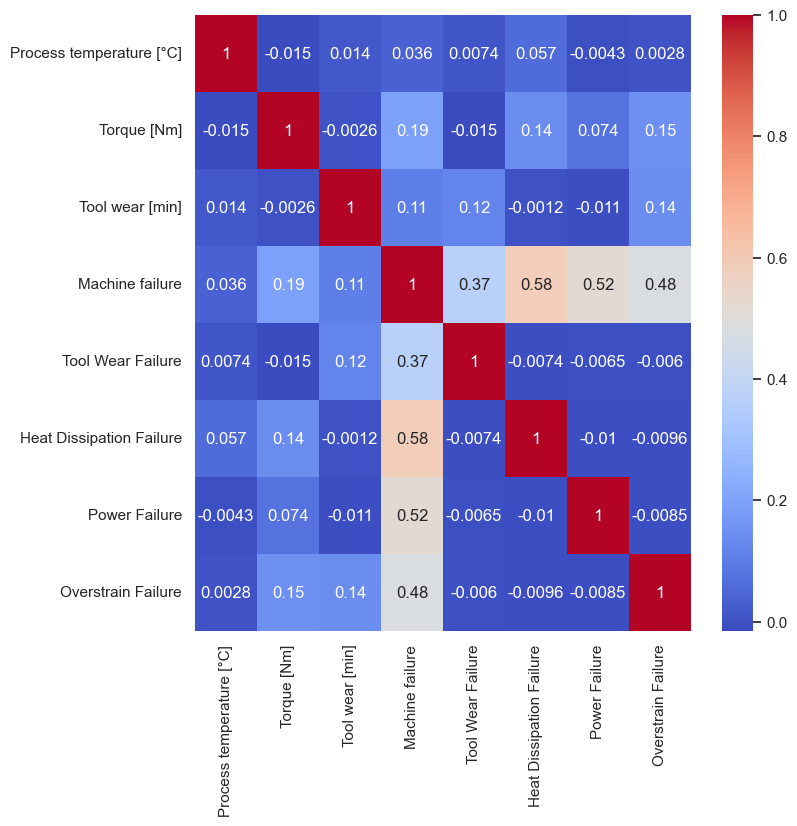

In [78]:
data_numeric = data_no_corr.drop(columns=non_numeric_columns)
plt.figure(figsize=(8, 8))
sns.heatmap(data_numeric.corr(), annot=True, cmap="coolwarm")
plt.show()

Now it can be clearly seen that after removing the two features, there is no more correlation except for the negligible correlation between the two types of target variables.

### Change naming of columns to remove [ and ]
(necessary for later steps, i.e. XGBoost)

In [79]:
data_no_corr.rename(columns={"Process temperature [°C]" : "Process temperature",
                            "Torque [Nm]" : "Torque", "Tool wear [min]" : "Tool wear"},inplace=True)

In [80]:
data_no_corr.head()

Type  Process temperature  Torque  Tool wear  Machine failure  \
0    M                35.45    42.8          0                0   
1    L                35.55    46.3          3                0   
2    L                35.35    49.4          5                0   
3    L                35.45    39.5          7                0   
4    L                35.55    40.0          9                0   

   Tool Wear Failure  Heat Dissipation Failure  Power Failure  \
0                  0                         0              0   
1                  0                         0              0   
2                  0                         0              0   
3                  0                         0              0   
4                  0                         0              0   

   Overstrain Failure Failure Mode  
0                   0   No Failure  
1                   0   No Failure  
2                   0   No Failure  
3                   0   No Failure  
4                   0   No Failure

### Remove variables of the individual error types
The four features "Tool Wear Failure","Heat Dissipation Failure","Power Failure","Overstrain Failure" are combined in the "Failure Mode" target variable and can be removed.

In [81]:
data_wo_failures = data_no_corr.drop(["Tool Wear Failure","Heat Dissipation Failure","Power Failure","Overstrain Failure"],axis=1)

In [82]:
data_wo_failures.head()

Type  Process temperature  Torque  Tool wear  Machine failure Failure Mode
0    M                35.45    42.8          0                0   No Failure
1    L                35.55    46.3          3                0   No Failure
2    L                35.35    49.4          5                0   No Failure
3    L                35.45    39.5          7                0   No Failure
4    L                35.55    40.0          9                0   No Failure

### One-Hot Encoding Feature "Type"

In [83]:
# Create dummy variables
dummy_variables = pd.get_dummies(data_wo_failures["Type"], drop_first=True)

In [84]:
# Add the dummy variables to the original Dataframe
data_with_dummies_type = pd.concat([data_wo_failures, dummy_variables], axis=1)

In [85]:
data_with_dummies_type.rename(columns={"L" : "Type_L", "M" : "Type_M"},inplace=True)

In [86]:
data_with_dummies_type.head()

Type  Process temperature  Torque  Tool wear  Machine failure Failure Mode  \
0    M                35.45    42.8          0                0   No Failure   
1    L                35.55    46.3          3                0   No Failure   
2    L                35.35    49.4          5                0   No Failure   
3    L                35.45    39.5          7                0   No Failure   
4    L                35.55    40.0          9                0   No Failure   

   Type_L  Type_M  
0   False    True  
1    True   False  
2    True   False  
3    True   False  
4    True   False

After the encoding, the column "Type" is no longer required and is removed.

In [87]:
data_with_dummies = data_with_dummies_type.drop(["Type"],axis=1)

In [88]:
data_with_dummies.head()

Process temperature  Torque  Tool wear  Machine failure Failure Mode  \
0                35.45    42.8          0                0   No Failure   
1                35.55    46.3          3                0   No Failure   
2                35.35    49.4          5                0   No Failure   
3                35.45    39.5          7                0   No Failure   
4                35.55    40.0          9                0   No Failure   

   Type_L  Type_M  
0   False    True  
1    True   False  
2    True   False  
3    True   False  
4    True   False

### Scaling
A scaling of the features is necessary at this point, since the variables are on different scales and this can influence the model building.
The RobustScaler is used for the "Torque" feature, since Torque contains outliers and this scaling technique is insensitive to outliers. For the other two features on different scales, "Process temperature" and "Tool wear", the StandardScaler is used, since the data is brought to a standard normal distribution with a mean value of 0 and a standard deviation of 1.

#### Robust Scaling

In [89]:
from sklearn.preprocessing import RobustScaler

# Create RobustScaler object
scaler = RobustScaler()

# Apply Robust Scaling to the Torque Feature
data_scaled = scaler.fit_transform(data_with_dummies[["Torque"]])

# Use the scaled feature in the transformed data
data_transformed = data_with_dummies.copy()
data_transformed["Torque"] = data_scaled

In [90]:
data_transformed.head()

Process temperature    Torque  Tool wear  Machine failure Failure Mode  \
0                35.45  0.200000          0                0   No Failure   
1                35.55  0.459259          3                0   No Failure   
2                35.35  0.688889          5                0   No Failure   
3                35.45 -0.044444          7                0   No Failure   
4                35.55 -0.007407          9                0   No Failure   

   Type_L  Type_M  
0   False    True  
1    True   False  
2    True   False  
3    True   False  
4    True   False

#### Standarad Scaling

In [91]:
from sklearn.preprocessing import StandardScaler

# Create StandardScaler object
scaler = StandardScaler()

# Apply standard scaling to the two features
data_scaled2 = scaler.fit_transform(data_transformed[["Process temperature", "Tool wear"]])

# Use the scaled features in the transformed2 data
data_transformed2 = data_transformed.copy()
data_transformed2[["Process temperature", "Tool wear"]] = data_scaled2

In [92]:
data_transformed2.head()

Process temperature    Torque  Tool wear  Machine failure Failure Mode  \
0            -0.946356  0.200000  -1.695647                0   No Failure   
1            -0.878954  0.459259  -1.648511                0   No Failure   
2            -1.013759  0.688889  -1.617087                0   No Failure   
3            -0.946356 -0.044444  -1.585664                0   No Failure   
4            -0.878954 -0.007407  -1.554240                0   No Failure   

   Type_L  Type_M  
0   False    True  
1    True   False  
2    True   False  
3    True   False  
4    True   False

### Split for binary and multi-class classification
At this point, the two separate dataframes are prepared, which are used for the binary and for the multi-class classification. Thus, in the following, only the target variable "Machine failure" is used in the first dataframe and only the target variable "Failure Mode" is used in the second dataframe.

In [93]:
# Create Dataframe data_bin for binary classification
data_bin = data_transformed2.drop(["Failure Mode"], axis=1)

In [94]:
data_bin.head()

Process temperature    Torque  Tool wear  Machine failure  Type_L  Type_M
0            -0.946356  0.200000  -1.695647                0   False    True
1            -0.878954  0.459259  -1.648511                0    True   False
2            -1.013759  0.688889  -1.617087                0    True   False
3            -0.946356 -0.044444  -1.585664                0    True   False
4            -0.878954 -0.007407  -1.554240                0    True   False

In [95]:
data_bin.describe(include="all")

Process temperature       Torque     Tool wear  Machine failure  \
count          9.973000e+03  9973.000000  9.973000e+03      9973.000000   
unique                  NaN          NaN           NaN              NaN   
top                     NaN          NaN           NaN              NaN   
freq                    NaN          NaN           NaN              NaN   
mean          -8.663591e-16    -0.008963 -9.974530e-17         0.033089   
std            1.000050e+00     0.738282  1.000050e+00         0.178879   
min           -2.901038e+00    -2.688889 -1.695647e+00         0.000000   
25%           -8.115508e-01    -0.511111 -8.629155e-01         0.000000   
50%            6.468589e-02     0.000000  1.239875e-03         0.000000   
75%            7.387141e-01     0.488889  8.496834e-01         0.000000   
max            2.558590e+00     2.703704  2.279468e+00         1.000000   

       Type_L Type_M  
count    9973   9973  
unique      2      2  
top      True  False  
freq     5984   6982  
mean      NaN    NaN  
std       NaN    NaN  
min       NaN    NaN  
25%       NaN    NaN  
50%       NaN    NaN  
75%       NaN    NaN  
max       NaN    NaN

In [96]:
# Create Dataframe data_multi for multi-class classification
data_multi = data_transformed2.drop(["Machine failure"], axis=1)

In [97]:
data_multi.head()

Process temperature    Torque  Tool wear Failure Mode  Type_L  Type_M
0            -0.946356  0.200000  -1.695647   No Failure   False    True
1            -0.878954  0.459259  -1.648511   No Failure    True   False
2            -1.013759  0.688889  -1.617087   No Failure    True   False
3            -0.946356 -0.044444  -1.585664   No Failure    True   False
4            -0.878954 -0.007407  -1.554240   No Failure    True   False

In [98]:
data_multi.describe(include="all")

Process temperature       Torque     Tool wear Failure Mode Type_L  \
count          9.973000e+03  9973.000000  9.973000e+03         9973   9973   
unique                  NaN          NaN           NaN            5      2   
top                     NaN          NaN           NaN   No Failure   True   
freq                    NaN          NaN           NaN         9643   5984   
mean          -8.663591e-16    -0.008963 -9.974530e-17          NaN    NaN   
std            1.000050e+00     0.738282  1.000050e+00          NaN    NaN   
min           -2.901038e+00    -2.688889 -1.695647e+00          NaN    NaN   
25%           -8.115508e-01    -0.511111 -8.629155e-01          NaN    NaN   
50%            6.468589e-02     0.000000  1.239875e-03          NaN    NaN   
75%            7.387141e-01     0.488889  8.496834e-01          NaN    NaN   
max            2.558590e+00     2.703704  2.279468e+00          NaN    NaN   

       Type_M  
count    9973  
unique      2  
top     False  
freq     6982  
mean      NaN  
std       NaN  
min       NaN  
25%       NaN  
50%       NaN  
75%       NaN  
max       NaN

# Binary Classification

### Rearrange the columns

In [99]:
data_bin.columns.values

array(['Process temperature', 'Torque', 'Tool wear', 'Machine failure',
       'Type_L', 'Type_M'], dtype=object)

In [100]:
# Declare a new variable that will contain the preferred order
# The most conventional order is: dependent variable, indepedendent numerical variables, dummies
cols = ["Machine failure", "Process temperature", "Torque", "Tool wear", "Type_L", "Type_M"]

In [101]:
# Implement the reordering, create a new data frame, equal to the old one but with the new order of features
data_preprocessed = data_bin[cols]
data_preprocessed.head()

Machine failure  Process temperature    Torque  Tool wear  Type_L  Type_M
0                0            -0.946356  0.200000  -1.695647   False    True
1                0            -0.878954  0.459259  -1.648511    True   False
2                0            -1.013759  0.688889  -1.617087    True   False
3                0            -0.946356 -0.044444  -1.585664    True   False
4                0            -0.878954 -0.007407  -1.554240    True   False

### Train-/Test-Split & Preparation for Modeling
Set predictors and target according to your dataframe:

In [102]:
target = data_preprocessed["Machine failure"]
predictors = data_preprocessed.drop(["Machine failure"], axis=1)

In [103]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=123)  
# 80-20 split into training and test data

Check data balancing on training dataset:

In [104]:
# Check data balancing
value_counts = y_train.value_counts()
percentage = value_counts / len(y_train) *100
print(value_counts)
print(percentage)

Machine failure
0    7724
1     254
Name: count, dtype: int64
Machine failure
0    96.816245
1     3.183755
Name: count, dtype: float64


Check data balancing on test dataset:

In [105]:
# Check data balancing
value_counts = y_test.value_counts()
percentage = value_counts / len(y_test) *100
print(value_counts)
print(percentage)

Machine failure
0    1919
1      76
Name: count, dtype: int64
Machine failure
0    96.190476
1     3.809524
Name: count, dtype: float64


### Oversampling
The data set is unbalanced with respect to the target variable, since the expression of the target variable to be predicted (in this case this is a machine defect with the value 1) is lower. In order to achieve a balanced ratio between the expressions of the target variables, an oversampling of the rare class is performed, increasing the number of examples of the rare class.
Both methods Random Oversampling and SMOTE Oversampling are tested and the effect is checked with a Random Forest Classifier, so that the more helpful technique can be applied.

Thus, a random forest model first has to be built and its performance on the unbalanced dataset has to be tested.

The goal in this case is to optimize the recall of the rarer class. Therefore, the objective should be to maximize the rate of true positives in order to detect as many machine defects as possible and not miss any. Optimizing the precision is not so important here, since it is not so bad to declare cases as defects when there is no defect. After all, this is only done as a precautionary check. But if the occurrence of an actual defect is not detected, the machine will fail and cause an interruption, which is to be avoided.

The oversampling is only performed on the training dataset, since the test dataset is to remain untouched and in this way is also to be used later in the model.

#### Oversampling training data set

#### Random Oversampling

In [106]:
# Random Forest model to check the performance of the oversampling methods
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Train the random forest model
rf = RandomForestClassifier()
baseline_model = rf.fit(X_train, y_train)
baseline_prediction = baseline_model.predict(X_test)
# Check the model performance
print(classification_report(y_test, baseline_prediction))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1919
           1       0.76      0.37      0.50        76

    accuracy                           0.97      1995
   macro avg       0.87      0.68      0.74      1995
weighted avg       0.97      0.97      0.97      1995



In [107]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

# Randomly over sample the minority class
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros= ros.fit_resample(X_train, y_train)
# Check the number of records after over sampling
print(sorted(Counter(y_train_ros).items()))

[(0, 7724), (1, 7724)]


Text(0.5, 1.0, 'Random Over Sampling')

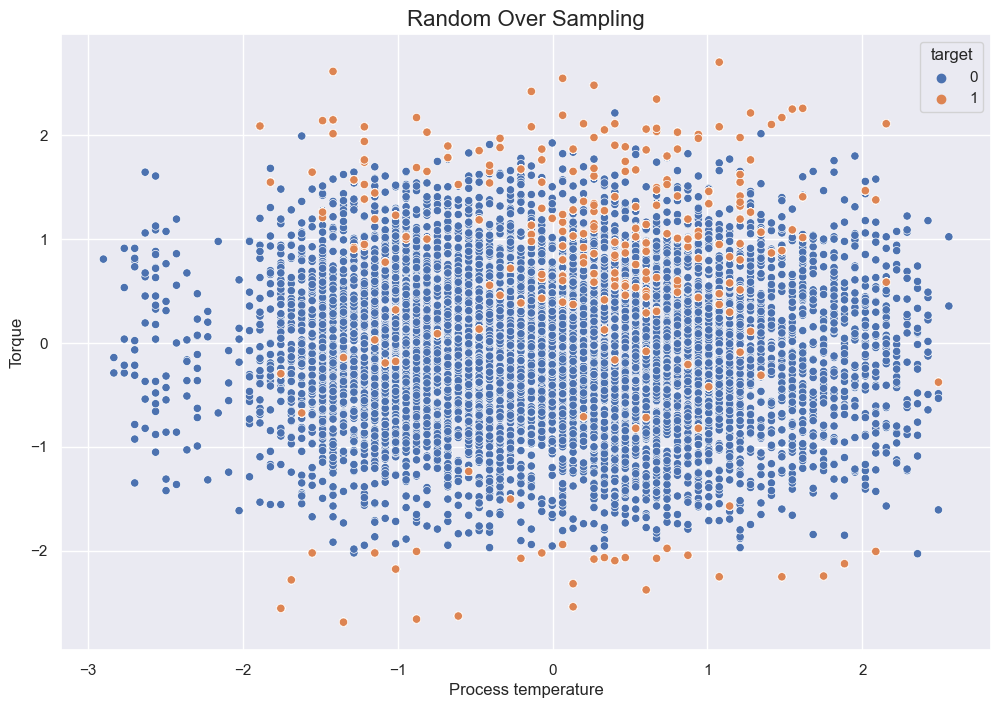

In [108]:
# Convert the data from numpy array to a pandas dataframe
df_ros = pd.DataFrame({"Process temperature": X_train_ros["Process temperature"], 
                       "Torque": X_train_ros["Torque"],"target": y_train_ros})
# Plot the chart
plt.figure(figsize=(12, 8))
sns.scatterplot(x = "Process temperature", y = "Torque", hue = "target", data = df_ros)
plt.title("Random Over Sampling")

In [109]:
# Train the random forest model
# rf = RandomForestClassifier()
ros_model = rf.fit(X_train_ros, y_train_ros)
ros_prediction = ros_model.predict(X_test)
# Check the model performance
print(classification_report(y_test, ros_prediction))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1919
           1       0.65      0.42      0.51        76

    accuracy                           0.97      1995
   macro avg       0.82      0.71      0.75      1995
weighted avg       0.97      0.97      0.97      1995



Random oversampling did not really produce a better result, as for the lower class the recall only increased from 38% to 39%.

#### SMOTE (Synthetic Minority Oversampling Technique) Oversampling

In [110]:
from imblearn.over_sampling import SMOTE

# Over sample the minority class
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote= smote.fit_resample(X_train, y_train)
# Check the number of records after over sampling
print(sorted(Counter(y_train_smote).items()))

[(0, 7724), (1, 7724)]


Text(0.5, 1.0, 'SMOTE Over Sampling')

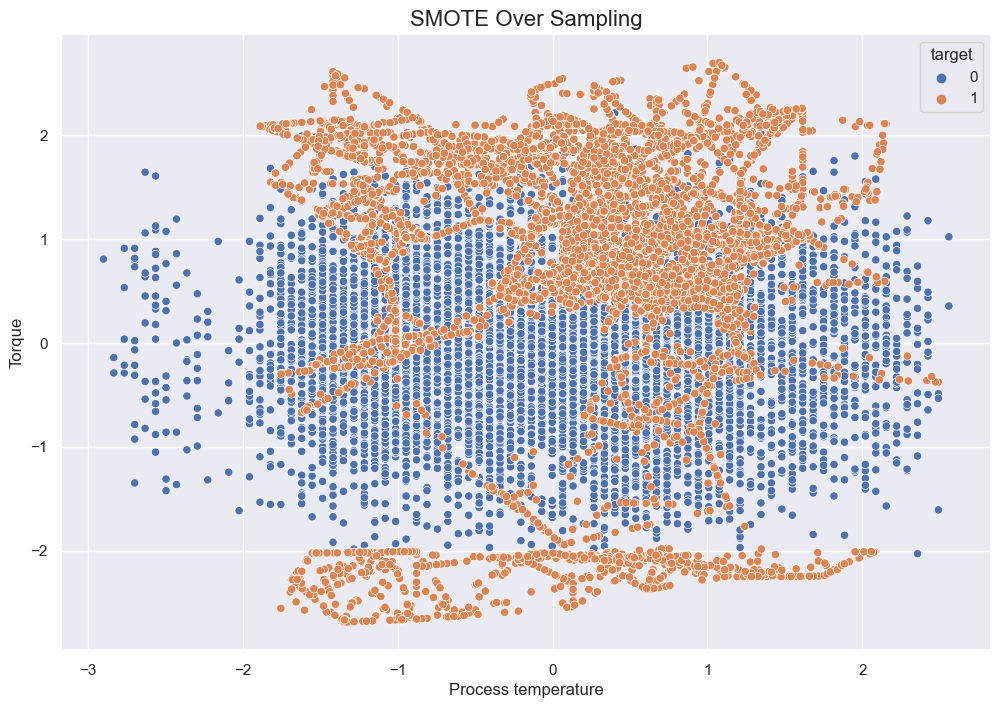

In [111]:
# Convert the data from numpy array to a pandas dataframe
df_smote = pd.DataFrame({"Process temperature": X_train_smote["Process temperature"], 
                       "Torque": X_train_smote["Torque"],"target": y_train_smote})
# Plot the chart
plt.figure(figsize=(12, 8))
sns.scatterplot(x = "Process temperature", y = "Torque", hue = "target", data = df_smote)
plt.title("SMOTE Over Sampling")

In [112]:
# Train the random forest model
# rf = RandomForestClassifier()
smote_model = rf.fit(X_train_smote, y_train_smote)
smote_prediction = smote_model.predict(X_test)
# Check the model performance
print(classification_report(y_test, smote_prediction))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1919
           1       0.33      0.55      0.42        76

    accuracy                           0.94      1995
   macro avg       0.66      0.75      0.69      1995
weighted avg       0.96      0.94      0.95      1995



SMOTE increased the recall of the lower class from 38% to 59%, significantly increasing the ability of the model to correctly recognize the lower class as often as possible. For this reason, the SMOTE oversampling technique is used for the present model.

## Modeling

In the following, some machine learning algorithms are successively applied to the binary classification dataset and the respective evaluation metrics are reported in order to compare the algorithms with each other.

The alogrithms that are tested are: Logistic Regression, Ridge Regression, Lasso Regression, Decision Tree, Random Forest, Gaussian NB, Gradient Boosting, XGBoost.
In each case, the same procedure is followed: The algorithm is imported and the corresponding model is trained. Then the trained algorithm makes the predictions based on the test data and finally evaluates important evaluation metrics such as accuracy, precision and recall. All metrics are shown in the Classification Report and the Confusion Matrix with the distribution of TP, TN, FP and FN is shown.

### Logistic Regression

Training Accuracy: 76.15 %
Model Accuracy Score: 73.43 %
Model Precision: 9.17 %
Model Recall: 67.11 %
--------------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.74      0.84      1919
           1       0.09      0.67      0.16        76

    accuracy                           0.73      1995
   macro avg       0.54      0.70      0.50      1995
weighted avg       0.95      0.73      0.82      1995

--------------------------------------------------------


Text(0.5, 1.0, 'Confusion Matrix')

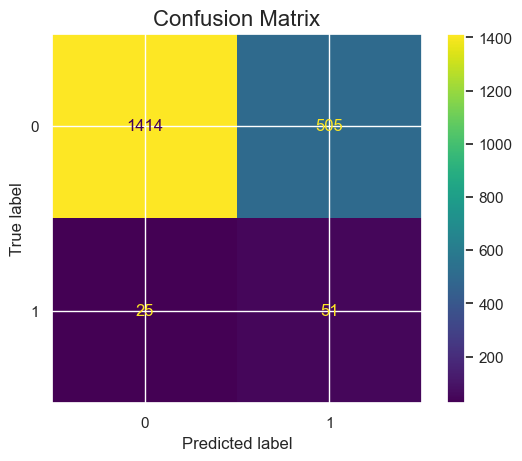

In [113]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
# Train the model
logreg.fit(X_train_smote, y_train_smote)
# Prediction for test data
y_pred_lr = logreg.predict(X_test)

# Calculation of evaluation metrics
log_train = round(logreg.score(X_train_smote, y_train_smote) * 100, 2)
log_accuracy = round(accuracy_score(y_pred_lr, y_test) * 100, 2)
log_precision = round(precision_score(y_test, y_pred_lr) * 100, 2)
log_recall = round(recall_score(y_test, y_pred_lr) * 100, 2)

# Printing of evaluation metrics, classification report and confusion matrix
print("Training Accuracy:", log_train, "%")
print("Model Accuracy Score:", log_accuracy, "%")
print("Model Precision:", log_precision, "%")
print("Model Recall:", log_recall, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification Report:\n", classification_report(y_test, y_pred_lr))
print("\033[1m--------------------------------------------------------\033[0m")
cm = confusion_matrix(y_test, y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")

### Ridge Regression

Training Accuracy: 75.46 %
Model Accuracy Score: 72.08 %
Model Precision: 8.89 %
Model Recall: 68.42 %
--------------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.72      0.83      1919
           1       0.09      0.68      0.16        76

    accuracy                           0.72      1995
   macro avg       0.54      0.70      0.50      1995
weighted avg       0.95      0.72      0.81      1995

--------------------------------------------------------


Text(0.5, 1.0, 'Confusion Matrix')

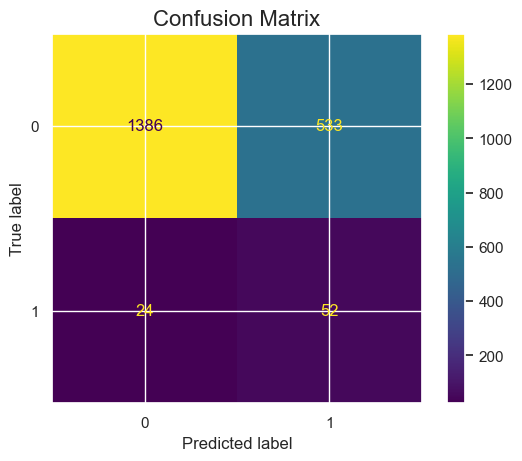

In [114]:
from sklearn.linear_model import RidgeClassifier

# Ridge Regression Model
ridge = RidgeClassifier(alpha=1.0)
ridge.fit(X_train_smote, y_train_smote)
y_pred_rc = ridge.predict(X_test)

rc_train = round(ridge.score(X_train_smote, y_train_smote) * 100, 2)
rc_accuracy = round(accuracy_score(y_pred_rc, y_test) * 100, 2)
rc_precision = round(precision_score(y_test, y_pred_rc) * 100, 2)
rc_recall = round(recall_score(y_test, y_pred_rc) * 100, 2)

print("Training Accuracy:", rc_train, "%")
print("Model Accuracy Score:", rc_accuracy, "%")
print("Model Precision:", rc_precision, "%")
print("Model Recall:", rc_recall, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification Report:\n", classification_report(y_test, y_pred_rc))
print("\033[1m--------------------------------------------------------\033[0m")
cm = confusion_matrix(y_test, y_pred_rc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")

### Lasso Regression

Training Accuracy: 76.17 %
Model Accuracy Score: 73.43 %
Model Precision: 9.17 %
Model Recall: 67.11 %
--------------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.74      0.84      1919
           1       0.09      0.67      0.16        76

    accuracy                           0.73      1995
   macro avg       0.54      0.70      0.50      1995
weighted avg       0.95      0.73      0.82      1995

--------------------------------------------------------


Text(0.5, 1.0, 'Confusion Matrix')

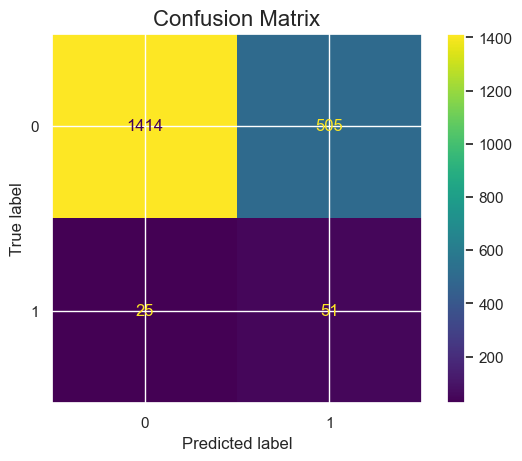

In [115]:
from sklearn.linear_model import Lasso

# Lasso Regression Model
lasso = LogisticRegression(penalty="l1", solver="liblinear")  # penalty="l1" für Lasso-Regression
lasso.fit(X_train_smote, y_train_smote)
y_pred_lasso = lasso.predict(X_test)

lasso_train = round(lasso.score(X_train_smote, y_train_smote) * 100, 2)
lasso_accuracy = round(accuracy_score(y_pred_lasso, y_test) * 100, 2)
lasso_precision = round(precision_score(y_test, y_pred_lasso) * 100, 2)
lasso_recall = round(recall_score(y_test, y_pred_lasso) * 100, 2)

print("Training Accuracy:", lasso_train, "%")
print("Model Accuracy Score:", lasso_accuracy, "%")
print("Model Precision:", lasso_precision, "%")
print("Model Recall:", lasso_recall, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification Report:\n", classification_report(y_test, y_pred_lasso))
print("\033[1m--------------------------------------------------------\033[0m")
cm = confusion_matrix(y_test, y_pred_lasso)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")

### Decision Tree

Training Accuracy    : 100.0 %
Model Accuracy Score : 93.13 %
Model Precision: 28.67 %
Model Recall: 53.95 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.98      0.95      0.96      1919
           1       0.29      0.54      0.37        76

    accuracy                           0.93      1995
   macro avg       0.63      0.74      0.67      1995
weighted avg       0.95      0.93      0.94      1995

--------------------------------------------------------


Text(0.5, 1.0, 'Confusion Matrix')

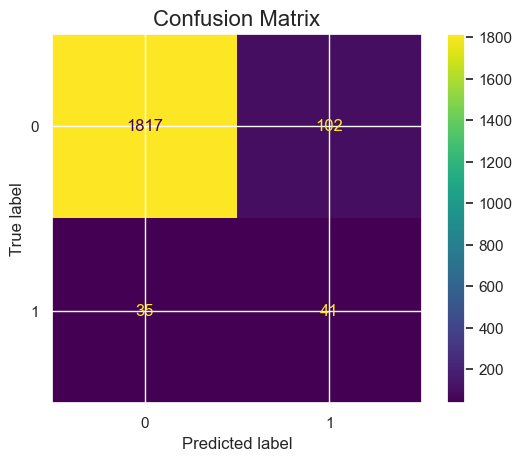

In [116]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
decision = DecisionTreeClassifier()
decision.fit(X_train_smote, y_train_smote)
y_pred_dec = decision.predict(X_test)

decision_train = round(decision.score(X_train_smote, y_train_smote) * 100, 2)
decision_accuracy = round(accuracy_score(y_pred_dec, y_test) * 100, 2)
decision_precision = round(precision_score(y_test, y_pred_dec) * 100, 2)
decision_recall = round(recall_score(y_test, y_pred_dec) * 100, 2)

print("Training Accuracy    :",decision_train ,"%")
print("Model Accuracy Score :",decision_accuracy ,"%")
print("Model Precision:", decision_precision, "%")
print("Model Recall:", decision_recall, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_dec))
print("\033[1m--------------------------------------------------------\033[0m")
cm = confusion_matrix(y_test, y_pred_dec)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")

### Random Forest

Training Accuracy    : 100.0 %
Model Accuracy Score : 94.39 %
Model Precision: 35.48 %
Model Recall: 57.89 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.98      0.96      0.97      1919
           1       0.35      0.58      0.44        76

    accuracy                           0.94      1995
   macro avg       0.67      0.77      0.71      1995
weighted avg       0.96      0.94      0.95      1995

--------------------------------------------------------


Text(0.5, 1.0, 'Confusion Matrix')

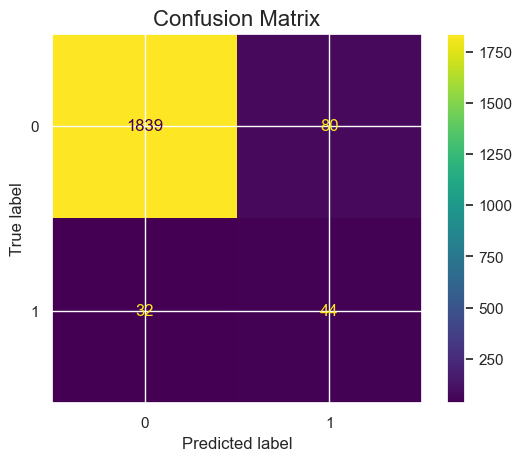

In [117]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train_smote, y_train_smote)
y_pred_rf = random_forest.predict(X_test)
random_forest.score(X_train_smote, y_train_smote)

random_forest_train = round(random_forest.score(X_train_smote, y_train_smote) * 100, 2)
random_forest_accuracy = round(accuracy_score(y_pred_rf, y_test) * 100, 2)
random_forest_precision = round(precision_score(y_test, y_pred_rf) * 100, 2)
random_forest_recall = round(recall_score(y_test, y_pred_rf) * 100, 2)

print("Training Accuracy    :",random_forest_train ,"%")
print("Model Accuracy Score :",random_forest_accuracy ,"%")
print("Model Precision:", random_forest_precision, "%")
print("Model Recall:", random_forest_recall, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_rf))
print("\033[1m--------------------------------------------------------\033[0m")
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")

### Gaussian NB

Training Accuracy    : 82.05 %
Model Accuracy Score : 78.8 %
Model Precision: 13.01 %
Model Recall: 80.26 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.99      0.79      0.88      1919
           1       0.13      0.80      0.22        76

    accuracy                           0.79      1995
   macro avg       0.56      0.80      0.55      1995
weighted avg       0.96      0.79      0.85      1995

--------------------------------------------------------


Text(0.5, 1.0, 'Confusion Matrix')

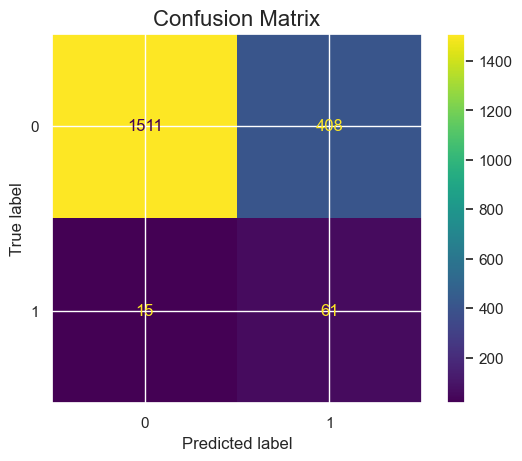

In [118]:
# Gaussian NB
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_smote, y_train_smote)
y_pred_gnb = gnb.predict(X_test)

gnb_train = round(gnb.score(X_train_smote, y_train_smote) * 100, 2)
gnb_accuracy = round(accuracy_score(y_pred_gnb, y_test) * 100, 2)
gnb_precision = round(precision_score(y_test, y_pred_gnb) * 100, 2)
gnb_recall = round(recall_score(y_test, y_pred_gnb) * 100, 2)

print("Training Accuracy    :",gnb_train ,"%")
print("Model Accuracy Score :",gnb_accuracy ,"%")
print("Model Precision:", gnb_precision, "%")
print("Model Recall:", gnb_recall, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_gnb))
print("\033[1m--------------------------------------------------------\033[0m")
cm = confusion_matrix(y_test, y_pred_gnb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")

### Gradient Boosting

Training Accuracy    : 92.69 %
Model Accuracy Score : 87.32 %
Model Precision: 18.95 %
Model Recall: 71.05 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.99      0.88      0.93      1919
           1       0.19      0.71      0.30        76

    accuracy                           0.87      1995
   macro avg       0.59      0.80      0.61      1995
weighted avg       0.96      0.87      0.91      1995

--------------------------------------------------------


Text(0.5, 1.0, 'Confusion Matrix')

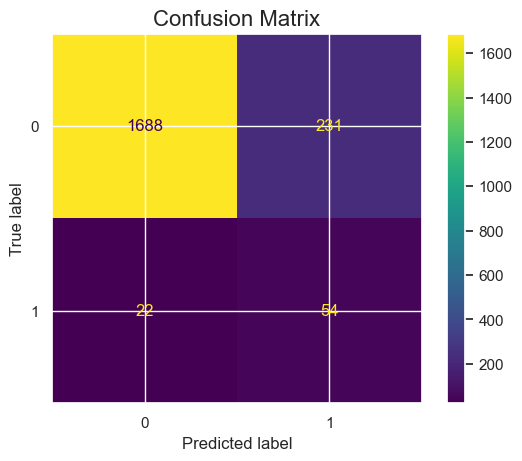

In [119]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 100,random_state = 42)
gbcl.fit(X_train_smote, y_train_smote)
y_pred_gbcl = gbcl.predict(X_test)

gbcl_train = round(gbcl.score(X_train_smote, y_train_smote) * 100, 2)
gbcl_accuracy = round(accuracy_score(y_pred_gbcl, y_test) * 100, 2)
gbcl_precision = round(precision_score(y_test, y_pred_gbcl) * 100, 2)
gbcl_recall = round(recall_score(y_test, y_pred_gbcl) * 100, 2)

print("Training Accuracy    :",gbcl_train ,"%")
print("Model Accuracy Score :",gbcl_accuracy ,"%")
print("Model Precision:", gbcl_precision, "%")
print("Model Recall:", gbcl_recall, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_gbcl))
print("\033[1m--------------------------------------------------------\033[0m")
cm = confusion_matrix(y_test, y_pred_gbcl)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")

### XGB Classifier

Training Accuracy    : 99.14 %
Model Accuracy Score : 87.32 %
Model Precision: 18.95 %
Model Recall: 71.05 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.99      0.88      0.93      1919
           1       0.19      0.71      0.30        76

    accuracy                           0.87      1995
   macro avg       0.59      0.80      0.61      1995
weighted avg       0.96      0.87      0.91      1995

--------------------------------------------------------


Text(0.5, 1.0, 'Confusion Matrix')

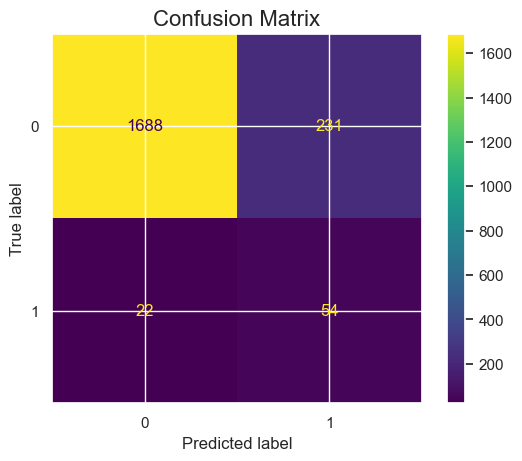

In [123]:
# XGB Classifier
from xgboost import XGBClassifier
xgbcl = XGBClassifier(n_estimators = 100, random_state = 42)
xgbcl.fit(X_train_smote, y_train_smote)
y_pred_xgbcl = gbcl.predict(X_test)

xgbcl_train = round(xgbcl.score(X_train_smote, y_train_smote) * 100, 2)
xgbcl_accuracy = round(accuracy_score(y_pred_xgbcl, y_test) * 100, 2)
xgbcl_precision = round(precision_score(y_test, y_pred_xgbcl) * 100, 2)
xgbcl_recall = round(recall_score(y_test, y_pred_xgbcl) * 100, 2)

print("Training Accuracy    :",xgbcl_train ,"%")
print("Model Accuracy Score :",xgbcl_accuracy ,"%")
print("Model Precision:", xgbcl_precision, "%")
print("Model Recall:", xgbcl_recall, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_xgbcl))
print("\033[1m--------------------------------------------------------\033[0m")
cm = confusion_matrix(y_test, y_pred_xgbcl)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")

### Comparison of the results of the relevant algorithms

In [124]:
models = pd.DataFrame({
    "Model": [
        "Logistic Regression", "Random Forest", "Gaussian Naive Bayes", "XGBoost"
    ],
    
    "Training Accuracy":
    [log_train, random_forest_train, gnb_train, xgbcl_train],
    
    "Model Accuracy Score": [
        log_accuracy, random_forest_accuracy, gnb_accuracy, xgbcl_accuracy
    ],

    "Precision": [
        log_precision, random_forest_precision, gnb_precision, xgbcl_precision
    ],

    "Recall": [
        log_recall, random_forest_recall, gnb_recall, xgbcl_recall
    ]
})

In [125]:
models

Model  Training Accuracy  Model Accuracy Score  Precision  \
0   Logistic Regression              76.15                 73.43       9.17   
1         Random Forest             100.00                 94.39      35.48   
2  Gaussian Naive Bayes              82.05                 78.80      13.01   
3               XGBoost              99.14                 87.32      18.95   

   Recall  
0   67.11  
1   57.89  
2   80.26  
3   71.05

# Multi-Class Classification

### Rearrange the columns

In [126]:
data_multi.columns.values

array(['Process temperature', 'Torque', 'Tool wear', 'Failure Mode',
       'Type_L', 'Type_M'], dtype=object)

In [127]:
# Declare a new variable that will contain the preferred order
# The most conventional order is: dependent variable, indepedendent numerical variables, dummies
cols = ["Failure Mode", "Process temperature", "Torque", "Tool wear", "Type_L", "Type_M"]

In [128]:
# Implement the reordering, create a new data frame, equal to the old one but with the new order of features
data_preprocessed_multi = data_multi[cols]
data_preprocessed_multi.head()

Failure Mode  Process temperature    Torque  Tool wear  Type_L  Type_M
0   No Failure            -0.946356  0.200000  -1.695647   False    True
1   No Failure            -0.878954  0.459259  -1.648511    True   False
2   No Failure            -1.013759  0.688889  -1.617087    True   False
3   No Failure            -0.946356 -0.044444  -1.585664    True   False
4   No Failure            -0.878954 -0.007407  -1.554240    True   False

### Label Encoding of the target variable Failure Mode

To transform the target variable "Failure Mode" from a categorical variable into a numerical variable, the LabelEncoding is first applied to it. This assigns a number to each feature expression. 
LabelEncoding is used here because it does not contain any order information about the expressions, which is very important here because the individual failure expressions do not have a ranking.

In [129]:
from sklearn.preprocessing import LabelEncoder

# Initialization of the LabelEncoder
label_encoder = LabelEncoder()
target = data_preprocessed_multi["Failure Mode"]

# LabelEncoding
data_preprocessed_multi["Failure Mode"] = label_encoder.fit_transform(target)

In [130]:
data_preprocessed_multi.head()

Failure Mode  Process temperature    Torque  Tool wear  Type_L  Type_M
0             1            -0.946356  0.200000  -1.695647   False    True
1             1            -0.878954  0.459259  -1.648511    True   False
2             1            -1.013759  0.688889  -1.617087    True   False
3             1            -0.946356 -0.044444  -1.585664    True   False
4             1            -0.878954 -0.007407  -1.554240    True   False

In [131]:
data_preprocessed_multi["Failure Mode"].value_counts()

Failure Mode
1    9643
0     115
3      91
2      78
4      46
Name: count, dtype: int64

After the LabelEncoding, the entry "No Failure" has the value 1, the "Heat dissipation failure" has 0, "Power failure" has 3, "Overstrain failure" 2 and "Tool wear failure" 4.

### Train-/Test-Split & Preparation for Modeling
Set predictors and target according to your dataframe:

In [132]:
target_multi = data_preprocessed_multi["Failure Mode"]
predictors_multi = data_preprocessed_multi.drop(["Failure Mode"], axis=1)

In [133]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(predictors_multi, target_multi, test_size=0.2, random_state=123)  
# 80-20 split into training and test data

Check data balancing on training dataset:

In [134]:
# Check data balancing
y_train.value_counts()

Failure Mode
1    7724
0      93
3      71
2      55
4      35
Name: count, dtype: int64

Check data balancing on test dataset:

In [135]:
# Check data balancing
y_test.value_counts()

Failure Mode
1    1919
2      23
0      22
3      20
4      11
Name: count, dtype: int64

### Oversampling training dataset

#### SMOTE (Synthetic Minority Oversampling Technique) Oversampling

In [136]:
from imblearn.over_sampling import SMOTE

# Over sample the minority class
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote= smote.fit_resample(X_train, y_train)
# Check the number of records after over sampling
print(sorted(Counter(y_train_smote).items()))

[(0, 7724), (1, 7724), (2, 7724), (3, 7724), (4, 7724)]


Text(0.5, 1.0, 'SMOTE Over Sampling')

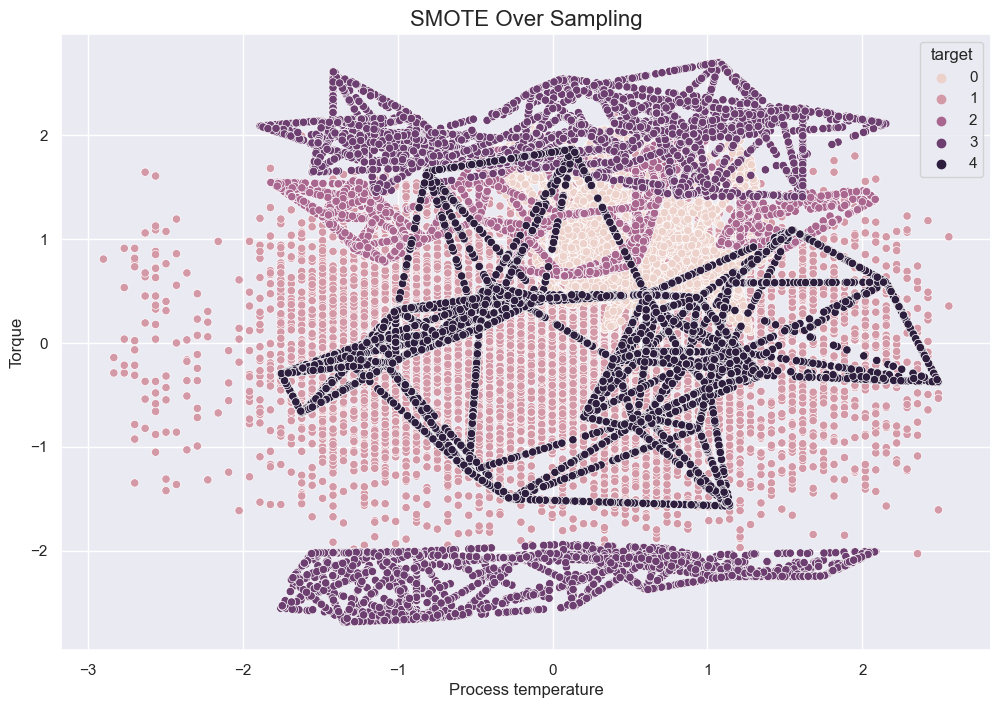

In [137]:
# Convert the data from numpy array to a pandas dataframe
df_smote = pd.DataFrame({"Process temperature": X_train_smote["Process temperature"], 
                       "Torque": X_train_smote["Torque"],"target": y_train_smote})
# Plot the chart
plt.figure(figsize=(12, 8))
sns.scatterplot(x = "Process temperature", y = "Torque", hue = "target", data = df_smote)
plt.title("SMOTE Over Sampling")

## Modeling

In the following, some machine learning algorithms are successively applied to the multi-class classification dataset and the respective evaluation metrics are reported in order to compare the algorithms with each other.

The alogrithms that are tested are: Logistic Regression, Decision Tree, Random Forest, Gaussian NB, Gradient Boosting, XGB Classifier.
In each case, the same procedure is followed: The algorithm is imported and the corresponding model is trained. Then the trained algorithm makes the predictions based on the test data and finally evaluates important evaluation metrics such as accuracy, precision and recall. All metrics are shown in the Classification Report and the Confusion Matrix with the distribution of TP, TN, FP and FN is shown.

### Logistic Regression

Training Accuracy: 65.79 %
Model Accuracy Score: 47.22 %
--------------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.03      0.55      0.05        22
           1       0.99      0.47      0.63      1919
           2       0.54      0.87      0.67        23
           3       0.02      0.40      0.03        20
           4       0.06      0.82      0.11        11

    accuracy                           0.47      1995
   macro avg       0.33      0.62      0.30      1995
weighted avg       0.96      0.47      0.62      1995

--------------------------------------------------------


Text(0.5, 1.0, 'Confusion Matrix')

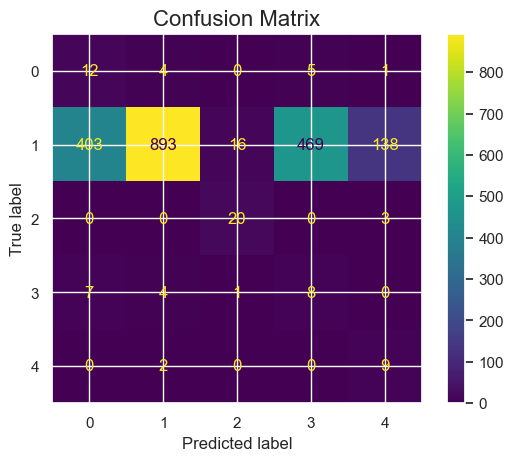

In [138]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
# Train the model
logreg.fit(X_train_smote, y_train_smote)
# Prediction for test data
y_pred_lr = logreg.predict(X_test)

# Calculation of evaluation metrics
log_train = round(logreg.score(X_train_smote, y_train_smote) * 100, 2)
log_accuracy = round(accuracy_score(y_pred_lr, y_test) * 100, 2)

# Printing of evaluation metrics, classification report and confusion matrix
print("Training Accuracy:", log_train, "%")
print("Model Accuracy Score:", log_accuracy, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification Report:\n", classification_report(y_test, y_pred_lr))
print("\033[1m--------------------------------------------------------\033[0m")
cm = confusion_matrix(y_test, y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")

### Decision Tree

Training Accuracy    : 100.0 %
Model Accuracy Score : 92.58 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.11      0.36      0.17        22
           1       0.98      0.95      0.96      1919
           2       0.79      0.65      0.71        23
           3       0.47      0.40      0.43        20
           4       0.00      0.00      0.00        11

    accuracy                           0.93      1995
   macro avg       0.47      0.47      0.46      1995
weighted avg       0.96      0.93      0.94      1995

--------------------------------------------------------


Text(0.5, 1.0, 'Confusion Matrix')

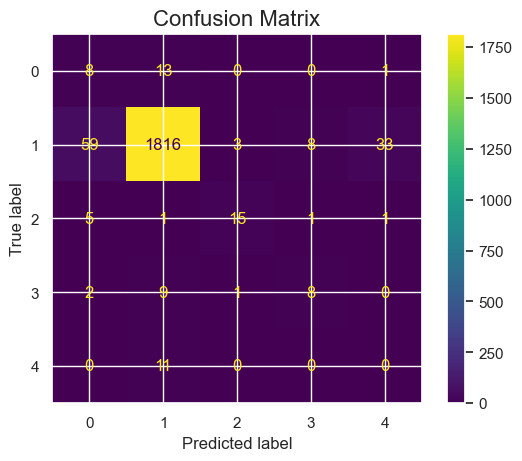

In [139]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
decision = DecisionTreeClassifier()
decision.fit(X_train_smote, y_train_smote)
y_pred_dec = decision.predict(X_test)

decision_train = round(decision.score(X_train_smote, y_train_smote) * 100, 2)
decision_accuracy = round(accuracy_score(y_pred_dec, y_test) * 100, 2)

print("Training Accuracy    :",decision_train ,"%")
print("Model Accuracy Score :",decision_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_dec))
print("\033[1m--------------------------------------------------------\033[0m")
cm = confusion_matrix(y_test, y_pred_dec)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")

### Random Forest

Training Accuracy    : 100.0 %
Model Accuracy Score : 92.33 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.10      0.36      0.16        22
           1       0.98      0.94      0.96      1919
           2       0.83      0.65      0.73        23
           3       0.48      0.50      0.49        20
           4       0.06      0.18      0.09        11

    accuracy                           0.92      1995
   macro avg       0.49      0.53      0.48      1995
weighted avg       0.96      0.92      0.94      1995

--------------------------------------------------------


Text(0.5, 1.0, 'Confusion Matrix')

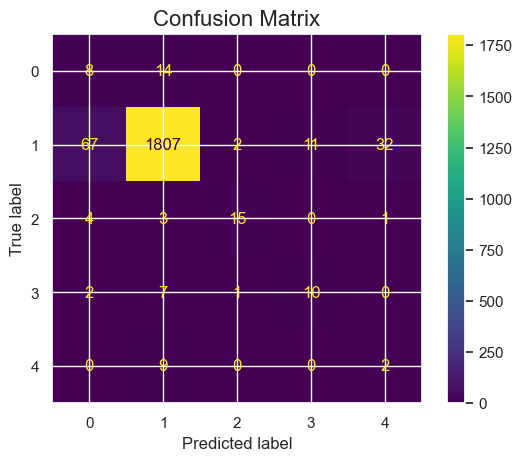

In [140]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train_smote, y_train_smote)
y_pred_rf = random_forest.predict(X_test)
random_forest.score(X_train_smote, y_train_smote)

random_forest_train = round(random_forest.score(X_train_smote, y_train_smote) * 100, 2)
random_forest_accuracy = round(accuracy_score(y_pred_rf, y_test) * 100, 2)

print("Training Accuracy    :",random_forest_train ,"%")
print("Model Accuracy Score :",random_forest_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_rf))
print("\033[1m--------------------------------------------------------\033[0m")
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")

### Gaussian NB

Training Accuracy    : 83.67 %
Model Accuracy Score : 69.82 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.07      0.86      0.13        22
           1       1.00      0.69      0.82      1919
           2       0.28      0.96      0.44        23
           3       0.10      0.80      0.17        20
           4       0.07      1.00      0.13        11

    accuracy                           0.70      1995
   macro avg       0.30      0.86      0.34      1995
weighted avg       0.97      0.70      0.79      1995

--------------------------------------------------------


Text(0.5, 1.0, 'Confusion Matrix')

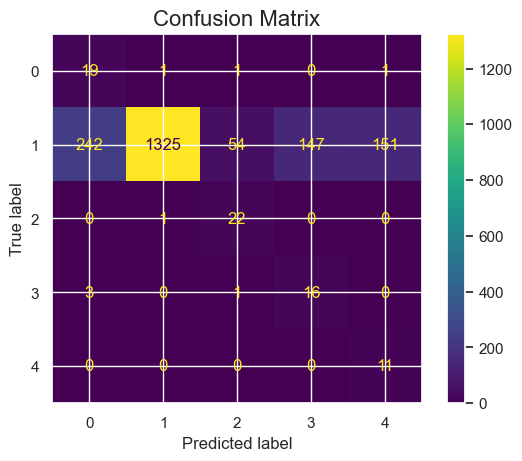

In [141]:
# Gaussian NB
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_smote, y_train_smote)
y_pred_gnb = gnb.predict(X_test)

gnb_train = round(gnb.score(X_train_smote, y_train_smote) * 100, 2)
gnb_accuracy = round(accuracy_score(y_pred_gnb, y_test) * 100, 2)

print("Training Accuracy    :",gnb_train ,"%")
print("Model Accuracy Score :",gnb_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_gnb))
print("\033[1m--------------------------------------------------------\033[0m")
cm = confusion_matrix(y_test, y_pred_gnb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")

### Gradient Boosting

Training Accuracy    : 95.47 %
Model Accuracy Score : 84.46 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.05      0.45      0.09        22
           1       0.99      0.85      0.92      1919
           2       0.65      0.87      0.74        23
           3       0.44      0.55      0.49        20
           4       0.06      0.45      0.10        11

    accuracy                           0.84      1995
   macro avg       0.44      0.64      0.47      1995
weighted avg       0.96      0.84      0.90      1995

--------------------------------------------------------


Text(0.5, 1.0, 'Confusion Matrix')

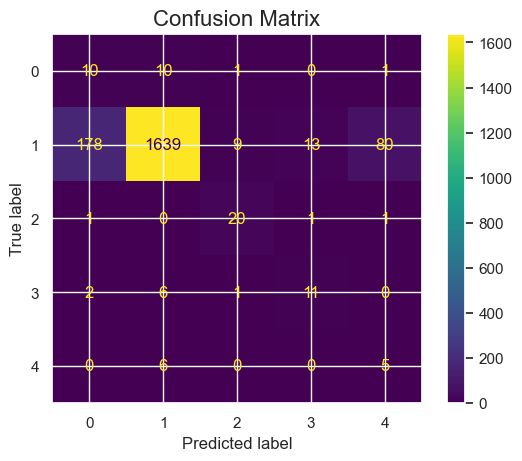

In [142]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 100,random_state = 42)
gbcl.fit(X_train_smote, y_train_smote)
y_pred_gbcl = gbcl.predict(X_test)

gbcl_train = round(gbcl.score(X_train_smote, y_train_smote) * 100, 2)
gbcl_accuracy = round(accuracy_score(y_pred_gbcl, y_test) * 100, 2)

print("Training Accuracy    :",gbcl_train ,"%")
print("Model Accuracy Score :",gbcl_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_gbcl))
print("\033[1m--------------------------------------------------------\033[0m")
cm = confusion_matrix(y_test, y_pred_gbcl)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")

### XGB Classifier

Training Accuracy    : 99.48 %
Model Accuracy Score : 84.46 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.05      0.45      0.09        22
           1       0.99      0.85      0.92      1919
           2       0.65      0.87      0.74        23
           3       0.44      0.55      0.49        20
           4       0.06      0.45      0.10        11

    accuracy                           0.84      1995
   macro avg       0.44      0.64      0.47      1995
weighted avg       0.96      0.84      0.90      1995

--------------------------------------------------------


Text(0.5, 1.0, 'Confusion Matrix')

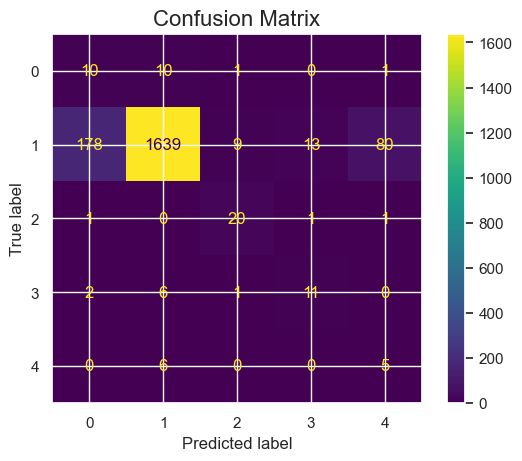

In [143]:
# XGB Classifier
from xgboost import XGBClassifier
xgbcl = XGBClassifier(n_estimators = 100, random_state = 42)
xgbcl.fit(X_train_smote, y_train_smote)
y_pred_xgbcl = gbcl.predict(X_test)

xgbcl_train = round(xgbcl.score(X_train_smote, y_train_smote) * 100, 2)
xgbcl_accuracy = round(accuracy_score(y_pred_xgbcl, y_test) * 100, 2)

print("Training Accuracy    :",xgbcl_train ,"%")
print("Model Accuracy Score :",xgbcl_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_xgbcl))
print("\033[1m--------------------------------------------------------\033[0m")
cm = confusion_matrix(y_test, y_pred_xgbcl)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")

## Neural Network with TensorFlow for the binary classification

### SMOTE (Synthetic Minority Oversampling Technique) Oversampling

In [144]:
from imblearn.over_sampling import SMOTE

target = data_preprocessed["Machine failure"]
predictors = data_preprocessed.drop(["Machine failure"], axis=1) 

# Randomly over sample the minority class
smote = SMOTE(random_state=42)
predictors_smote, target_smote= smote.fit_resample(predictors, target)
# Check the number of records after over sampling
print(sorted(Counter(target_smote).items()))

[(0, 9643), (1, 9643)]


Text(0.5, 1.0, 'SMOTE Over Sampling')

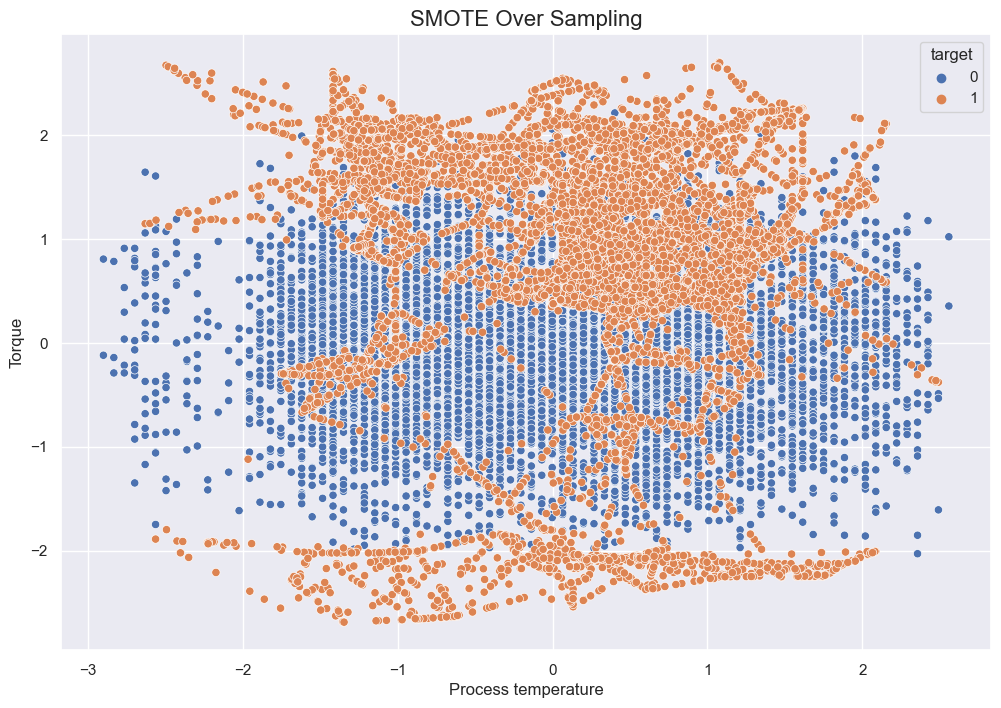

In [145]:
# Convert the data from numpy array to a pandas dataframe
df_smote = pd.DataFrame({"Process temperature": predictors_smote["Process temperature"], 
                       "Torque": predictors_smote["Torque"],"target": target_smote})
# Plot the chart
plt.figure(figsize=(12, 8))
sns.scatterplot(x = "Process temperature", y = "Torque", hue = "target", data = df_smote)
plt.title("SMOTE Over Sampling")

### Import tensorflow

In [146]:
import tensorflow as tf
from tensorflow.keras import layers

### Train-test-validation split

In [147]:
train, val, test = np.split(
    data_preprocessed.sample(frac=1), [int(0.8 * len(data_preprocessed)), int(0.9 * len(data_preprocessed))]
)

print(f"{len(train)} train examples")
print(f"{len(val)} validation examples")
print(f"{len(test)} test examples")

7978 train examples
997 validation examples
998 test examples


In [152]:
def df_to_dataset(data_preprocessed, shuffle=True, batch_size=32):
    df = data_preprocessed.copy()
    labels = df.pop("Machine failure")
    
    # Convert each Series to a NumPy array before adding a new axis
    df = {key: value.to_numpy()[:, tf.newaxis] for key, value in df.items()}
    
    ds = tf.data.Dataset.from_tensor_slices((dict(df), labels))
    
    if shuffle:
        ds = ds.shuffle(buffer_size=len(df))
    ds = ds.batch(batch_size)
    return ds

In [153]:
batch_size = 5
train_ds = df_to_dataset(train, shuffle=False, batch_size=batch_size)

In [154]:
[(train_features, label_batch)] = train_ds.take(1)
print(f"Every feature: {list(train_features.keys())}")
print(f'A batch of mean symmetry values: {train_features["Process temperature"]}')
print(f"A batch of targets {label_batch}")

Every feature: ['Process temperature', 'Torque', 'Tool wear', 'Type_L', 'Type_M']
A batch of mean symmetry values: [[ 0.33429716]
 [ 0.06468589]
 [-1.21596767]
 [ 0.94092253]
 [-2.22700995]]
A batch of targets [0 0 0 0 0]


In [155]:
def get_normalization_layer(name, dataset):
    # Creating a Normalization layer for the feature.
    normalizer = tf.keras.layers.Normalization(axis=None)

    # Preparing a Dataset that only yields the feature.
    feature_ds = dataset.map(lambda x, y: x[name])

    # Learning the statistics of the data.
    normalizer.adapt(feature_ds)

    return normalizer

In [156]:
process_temperature_col = train_features["Process temperature"]
process_temperature_col

<tf.Tensor: shape=(5, 1), dtype=float64, numpy=
array([[ 0.33429716],
       [ 0.06468589],
       [-1.21596767],
       [ 0.94092253],
       [-2.22700995]])>

In [157]:
layer = get_normalization_layer("Process temperature", train_ds)
layer(process_temperature_col)

<tf.Tensor: shape=(5, 1), dtype=float32, numpy=
array([[ 0.34106612],
       [ 0.07016905],
       [-1.2165921 ],
       [ 0.95058465],
       [-2.2324562 ]], dtype=float32)>

In [158]:
batch_size = 64
train_ds = df_to_dataset(train, batch_size=batch_size)
val_ds = df_to_dataset(val, shuffle=False, batch_size=batch_size)
test_ds = df_to_dataset(test, shuffle=False, batch_size=batch_size)

In [159]:
data_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9973 entries, 0 to 9972
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Machine failure      9973 non-null   int64  
 1   Process temperature  9973 non-null   float64
 2   Torque               9973 non-null   float64
 3   Tool wear            9973 non-null   float64
 4   Type_L               9973 non-null   bool   
 5   Type_M               9973 non-null   bool   
dtypes: bool(2), float64(3), int64(1)
memory usage: 331.3 KB


In [160]:
# Defining a suitable subset of predictors (predictors that are not correlated)
feature_columns = [
    "Process temperature",
    "Torque",
    "Tool wear",
    "Type_L",
    "Type_M"]

In [161]:
all_inputs = []
encoded_features = []

# Numeric features
for header in feature_columns:
    numeric_col = tf.keras.Input(shape=(1,), name=header)
    normalization_layer = get_normalization_layer(header, train_ds)
    encoded_numeric_col = normalization_layer(numeric_col)
    all_inputs.append(numeric_col)
    encoded_features.append(encoded_numeric_col)

In [162]:
all_features = tf.keras.layers.concatenate(encoded_features)
x1 = tf.keras.layers.Dense(32, activation="relu")(all_features)
output = tf.keras.layers.Dense(1, activation="sigmoid")(x1)
model = tf.keras.Model(all_inputs, output)
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=["accuracy"],
)

In [163]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ Process temperature │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Torque (InputLayer) │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Tool wear           │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Type_L (InputLayer) │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Type_M (InputLayer) │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_1     │ (None, 1)         │          3 │ Process           │
│ (Normalization)     │                   │            │ temperature[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_2     │ (None, 1)         │          3 │ Torque[0][0]      │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_3     │ (None, 1)         │          3 │ Tool wear[0][0]   │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_4     │ (None, 1)         │          3 │ Type_L[0][0]      │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_5     │ (None, 1)         │          3 │ Type_M[0][0]      │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 5)         │          0 │ normalization_1[… │
│ (Concatenate)       │                   │            │ normalization_2[… │
│                     │                   │            │ normalization_3[… │
│                     │                   │            │ normalization_4[… │
│                     │                   │            │ normalization_5[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 32)        │        192 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 1)         │         33 │ dense[0][0]       │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 240 (980.00 B)

 Trainable params: 225 (900.00 B)

 Non-trainable params: 15 (80.00 B)

In [164]:
history = model.fit(train_ds, epochs=50, validation_data=val_ds)

Epoch 1/50


C:\Users\ar\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\nn.py:674: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8031 - loss: 0.5329 - val_accuracy: 0.9709 - val_loss: 0.2347
Epoch 2/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 863us/step - accuracy: 0.9690 - loss: 0.2000 - val_accuracy: 0.9709 - val_loss: 0.1545
Epoch 3/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 970us/step - accuracy: 0.9690 - loss: 0.1415 - val_accuracy: 0.9709 - val_loss: 0.1369
Epoch 4/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 910us/step - accuracy: 0.9690 - loss: 0.1252 - val_accuracy: 0.9709 - val_loss: 0.1300
Epoch 5/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 856us/step - accuracy: 0.9690 - loss: 0.1173 - val_accuracy: 0.9709 - val_loss: 0.1256
Epoch 6/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 867us/step - accuracy: 0.9691 - loss: 0.1122 - val_accuracy: 0.9719 - val_loss: 0.1218
Epoch 7/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 881us/step - accuracy: 0.9699 - loss: 0.1086 - val_accuracy: 0.9729 - val_loss: 0.1185
Epoch 8/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 871us/step - accuracy: 0.9706 - loss: 0.1059 - val_accuracy:

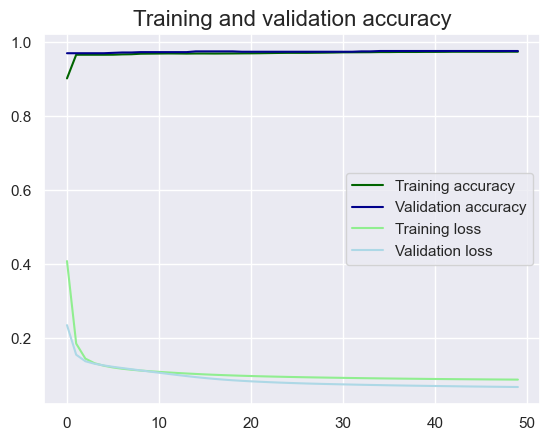

<Figure size 640x480 with 0 Axes>

In [165]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(len(acc))

plt.plot(epochs, acc, "darkgreen", label="Training accuracy")
plt.plot(epochs, val_acc, "darkblue", label="Validation accuracy")
plt.plot(epochs, loss, "lightgreen", label="Training loss")
plt.plot(epochs, val_loss, "lightblue", label="Validation loss")
plt.title("Training and validation accuracy")
plt.legend(loc=0)
plt.figure()


plt.show()

In [166]:
loss, accuracy = model.evaluate(test_ds)
print("Accuracy", accuracy)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9773 - loss: 0.0762
Accuracy 0.9719439148902893


In [167]:
y_pred = model.predict(test_ds)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [168]:
predicted_categories = tf.round(y_pred)

In [169]:
true_categories = tf.concat([y for x, y in test_ds], axis=0)

In [170]:
true_categories

<tf.Tensor: shape=(998,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
     

In [171]:
# shows count of true negatives, false positives, false negatives, true positives
confusion_matrix(predicted_categories, true_categories)

array([[961,  27],
       [  1,   9]], dtype=int64)

In [172]:
# check that tp, fp, tn, fn are not confused
tn, fp, fn, tp = confusion_matrix(true_categories, predicted_categories).ravel()
print(tn, fp, fn, tp)

961 1 27 9


In [173]:
# shows class-specific precision, recall and f1-score
print(classification_report(true_categories, predicted_categories))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       962
           1       0.90      0.25      0.39        36

    accuracy                           0.97       998
   macro avg       0.94      0.62      0.69       998
weighted avg       0.97      0.97      0.96       998

